<div class="alert alert-success" style="background-color: gray; color: white;">
    <center><h1>Data Mining Final Project</h1></center><br>
    <center>2023/2024</center>
</div>

### Group number  45 - Registration

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
|1|                Tomás Castilho           |        20230518            |
|2|                Francisco Campos           |        20230565            |


# 1. Imports

**ONLY IF NEEDED, INSTALL THIS**

In [1]:
# Data Manipulation and Processing
# !pip install pandas numpy

# Data Partition
# !pip install scikit-learn

# Data Transformation
# !pip install scikit-learn

# Outliers
# !pip install scikit-learn scipy

# Feature Selection
# !pip install scikit-learn

# Data Visualization
# !pip install seaborn matplotlib

# Clustering
# !pip install scikit-learn

# Additional Visualization
# !pip install matplotlib numpy seaborn

# Additional Clustering
# !pip install scikit-learn

# SOMPY Library
# !pip install sompy

# Machine Learning Models
# !pip install scikit-learn

# Dimensionality Reduction
# !pip install umap-learn scikit-learn

# General Utilities
# !No additional installations needed for warnings module.

**!!!RUN FROM HERE!!!**

In [139]:
# Data Manipulation and Processing
import pandas as pd
import numpy as np

# Data Partition
from sklearn.model_selection import train_test_split

# Data Transformation
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

# Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# Feature Selection
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV, chi2

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors as mpl_colors, cm
from textwrap import wrap

# Clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import (
    AgglomerativeClustering,
    KMeans,
    estimate_bandwidth,
    MeanShift,
    DBSCAN,
)
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram

# Additional Visualization
import math
import graphviz

# Additional Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Machine Learning Models
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier

# Dimensionality Reduction
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# SOMPY Library
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView


#Unsorted
from sklearn.base import clone

In [3]:
# General Utilities
import warnings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
%matplotlib inline

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.


# 2. Loading Data 

In [4]:
# Reading the data
df_original= pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')

#Making a simple copy
df = df_original.copy()

The data is copied from df_original to a new DataFrame to maintain the original version unchanged.

In [5]:
print('The dataset has', df_original.shape[0], 'rows, and', df_original.shape[1], 'columns')

The dataset has 14942 rows, and 31 columns


# 3. Data Exploration and Analysis

In [6]:
df.head(5)

ID  Age  Gender  Income EnrollmentStart EnrollmentFinish  \
0  10000   60  Female  5500.0      2019-09-03       2019-10-31   
1  10001   29  Female  2630.0      2014-08-12       2015-09-14   
2  10002   23    Male  1980.0      2017-05-02       2017-06-01   
3  10003    9    Male     0.0      2018-09-05       2019-02-12   
4  10004   35    Male  4320.0      2016-04-20       2018-06-07   

  LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  ...  \
0      2019-07-01       2019-12-31    2019-10-30                     1  ...   
1      2015-01-01       2015-12-31    2015-07-16                    60  ...   
2      2017-01-01       2017-06-30    2017-05-25                     7  ...   
3      2018-07-01       2019-06-30    2019-01-21                    22  ...   
4      2018-01-01       2018-06-30    2017-11-09                   210  ...   

   OtherActivities  NumberOfFrequencies  AttendedClasses  \
0              0.0                  9.0                7   
1              0.0                 23.0                1   
2              0.0                  6.0                0   
3              0.0                 20.0                2   
4              NaN                 41.0                0   

   AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
0                       NaN                        6.28                   2   
1                       2.0                       17.42                   1   
2                       7.0                       30.03                   6   
3                       2.0                       17.72                   3   
4                       7.0                       60.97                   0   

   NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  
0                 0            0.0                   0        0  
1                 2            0.0                   0        1  
2                 0            0.0                   0        1  
3                 0            0.0                   0        1  
4                 3            0.0                   0        1  

[5 rows x 31 columns]

## 3.1 Setting Index <a class="anchor" id="loadingdata"></a>

Defining ID as index of the DataFrame.

In [7]:
df.set_index('ID',inplace=True)
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10004  ...              NaN                 41.0                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10001                       2.0                       17.42   
10002                       7.0                       30.03   
10003                       2.0                       17.72   
10004                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002                   6                 0            0.0   
10003                   3                 0            0.0   
10004                   0                 3            0.0   

       NumberOfReferences  Dropout  
ID                                  
10000                   0        0  
10001                   0        1  
10002                   0        1  
10003                   0        1  
10004                   0        1  

[5 rows x 30 columns]

## 3.2 Checking for data types <a class="anchor" id="initialanalysis"></a>

In [8]:
df.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRene

## 3.3 Checking for missing values <a class="anchor" id="undesirablecharacters"></a>

In [9]:
df.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

A lot of variables have missing values. WE will fix that on Feature Engineering.

## 3.4 Checking for duplicated values <a class="anchor" id="undesirablecharacters"></a>

In [10]:
df.duplicated().sum()

1

Looking at the duplicated rows

In [11]:
df[df.duplicated(keep=False)]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
18942   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   
22873   12  Female     0.0      2019-06-18       2019-09-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
18942       2019-12-31    2019-07-31                    41          73.35   
22873       2019-12-31    2019-07-31                    41          73.35   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
18942  ...              0.0                 14.0                7   
22873  ...              0.0                 14.0                7   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
18942                       5.0                        44.3   
22873                       5.0                        44.3   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
18942                  10                 1            0.0   
22873                  10                 1            0.0   

       NumberOfReferences  Dropout  
ID                                  
18942                   0        1  
22873                   0        1  

[2 rows x 30 columns]

## 3.5 Generate descriptive statistics<a class="anchor" id="types"></a>

In [12]:
df.describe(include ='all').transpose()

count unique         top  freq         mean  \
Age                         14942.0    NaN         NaN   NaN    26.015794   
Gender                        14942      2      Female  8931          NaN   
Income                      14447.0    NaN         NaN   NaN  2230.816086   
EnrollmentStart               14942   1490  2015-03-02    92          NaN   
EnrollmentFinish              14942   1300  2015-09-16  1684          NaN   
LastPeriodStart               14942     12  2019-07-01  3172          NaN   
LastPeriodFinish              14942     11  2019-12-31  3694          NaN   
DateLastVisit                 14942   1384  2019-10-31   475          NaN   
DaysWithoutFrequency        14942.0    NaN         NaN   NaN    81.224936   
LifetimeValue               14942.0    NaN         NaN   NaN   302.561871   
UseByTime                   14942.0    NaN         NaN   NaN     0.047116   
AthleticsActivities         14906.0    NaN         NaN   NaN      0.00738   
WaterActivities             14905.0    NaN         NaN   NaN     0.296209   
FitnessActivities           14907.0    NaN         NaN   NaN     0.576038   
DanceActivities             14906.0    NaN         NaN   NaN          0.0   
TeamActivities              14907.0    NaN         NaN   NaN     0.055544   
RacketActivities            14905.0    NaN         NaN   NaN     0.023415   
CombatActivities            14909.0    NaN         NaN   NaN     0.107921   
NatureActivities            14895.0    NaN         NaN   NaN          0.0   
SpecialActivities           14898.0    NaN         NaN   NaN     0.026514   
OtherActivities             14907.0    NaN         NaN   NaN     0.001878   
NumberOfFrequencies         14916.0    NaN         NaN   NaN    40.120542   
AttendedClasses             14942.0    NaN         NaN   NaN    10.152456   
AllowedWeeklyVisitsBySLA    14407.0    NaN         NaN   NaN     5.759561   
AllowedNumberOfVisitsBySLA  14942.0    NaN         NaN   NaN    41.636299   
RealNumberOfVisits          14942.0    NaN         NaN   NaN     5.320707   
NumberOfRenewals            14942.0    NaN         NaN   NaN      1.20526   
HasReferences               14930.0    NaN         NaN   NaN     0.019893   
NumberOfReferences          14942.0    NaN         NaN   NaN     0.022286   
Dropout                     14942.0    NaN         NaN   NaN     0.800964   

                                    std   min     25%     50%      75%  \
Age                           14.156582   0.0    19.0    23.0     31.0   
Gender                              NaN   NaN     NaN     NaN      NaN   
Income                      1566.527734   0.0  1470.0  1990.0   2790.0   
EnrollmentStart                     NaN   NaN     NaN     NaN      NaN   
EnrollmentFinish                    NaN   NaN     NaN     NaN      NaN   
LastPeriodStart                     NaN   NaN     NaN     NaN      NaN   
LastPeriodFinish                    NaN   NaN     NaN     NaN      NaN   
DateLastVisit                       NaN   NaN     NaN     NaN      NaN   
DaysWithoutFrequency         144.199576   0.0    13.0    41.0    83.75   
LifetimeValue                364.319566   0.0    83.6   166.2  355.075   
UseByTime                      0.211893   0.0     0.0     0.0      0.0   
AthleticsActivities             0.08559   0.0     0.0     0.0      0.0   
WaterActivities                  0.4566   0.0     0.0     0.0      1.0   
FitnessActivities              0.494201   0.0     0.0     1.0      1.0   
DanceActivities                     0.0   0.0     0.0     0.0      0.0   
TeamActivities                 0.229047   0.0     0.0     0.0      0.0   
RacketActivities               0.151222   0.0     0.0     0.0      0.0   
CombatActivities               0.310292   0.0     0.0     0.0      0.0   
NatureActivities                    0.0   0.0     0.0     0.0      0.0   
SpecialActivities              0.160662   0.0     0.0     0.0      0.0   
OtherActivities                  0.0433   0.0     0.0     0.0      0.0   
NumberOfFreque

**Analysis of the describe method:**


By analysing the table we saw that we had a lot of missing values and some outliers

-  LifetimeValue, seem to have outliers on the lower and higher side.
-  DaysWithoutFrequency, NumberOfFrequencies, AttendedClasses, AllowedNumberOfVisitsBySLA, RealNumberOfVisits,  seem to have outliers on the higher side.
-  Age, seem to have outliers on the lower side.

## 3.6 Visual Exploration<a class="anchor" id="types"></a>
### Defining metric and non-metric features

In [13]:
non_metric_features = ['Gender','UseByTime','HasReferences','Dropout',
                      'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 
                     'DanceActivities','TeamActivities', 'RacketActivities', 
                     'CombatActivities', 'NatureActivities','SpecialActivities', 'OtherActivities']


date_features = ['EnrollmentStart','EnrollmentFinish','LastPeriodStart','LastPeriodFinish','DateLastVisit']


metric_features = [feature for feature in df.columns if feature not in non_metric_features + date_features]


In [14]:
activity_features = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 
                     'DanceActivities','TeamActivities', 'RacketActivities', 
                     'CombatActivities', 'NatureActivities','SpecialActivities', 'OtherActivities']

#### Metric Features

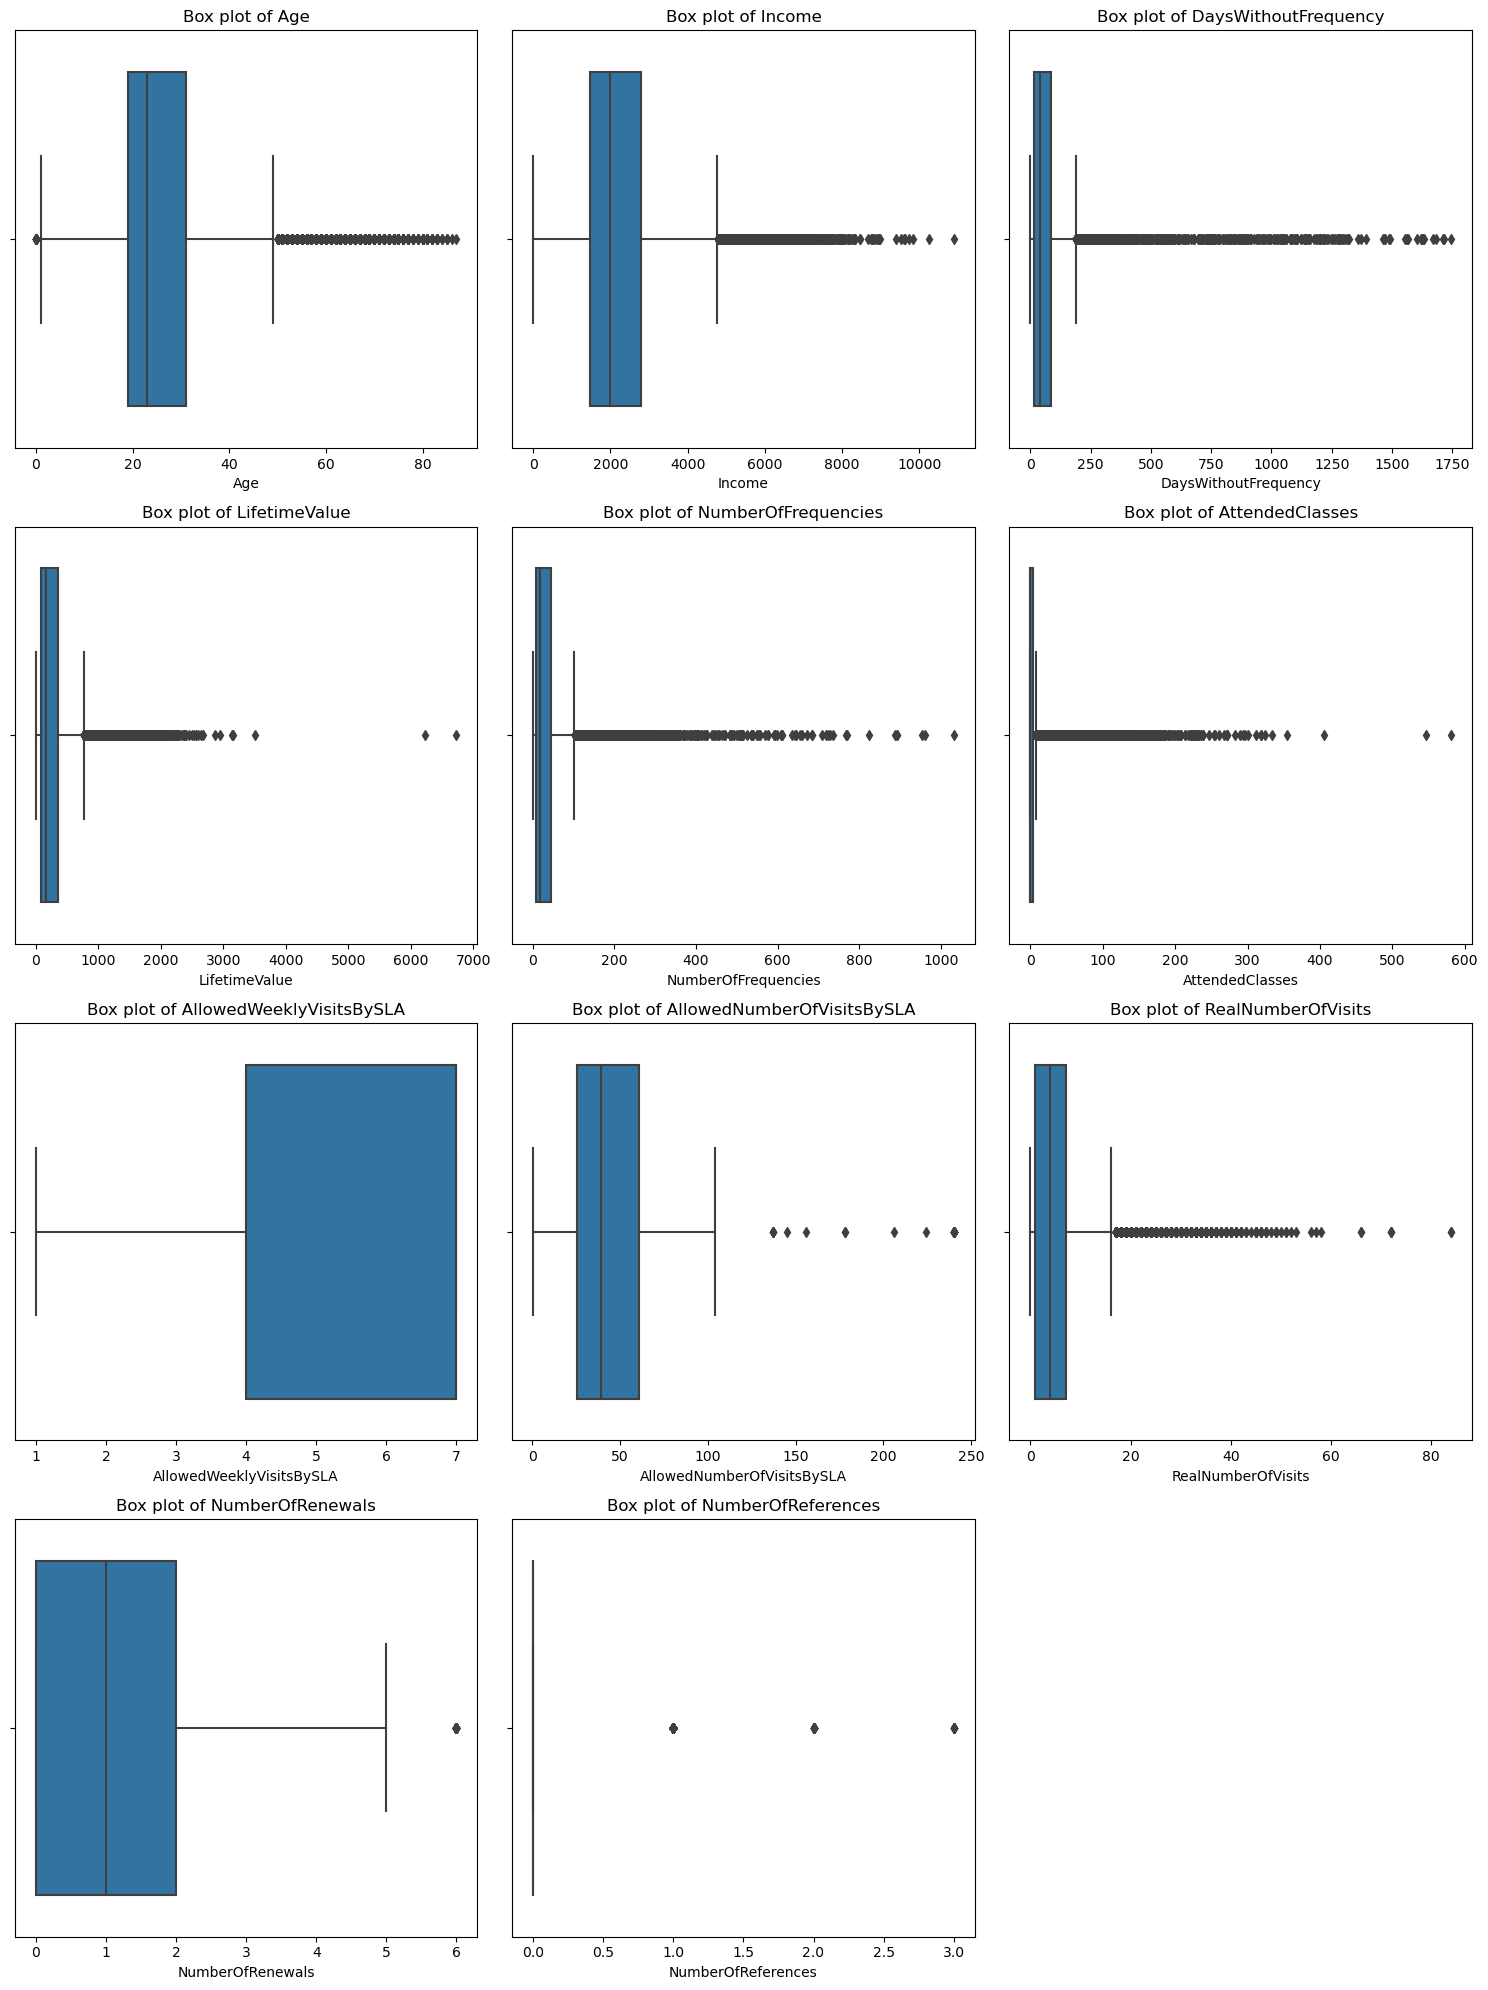

In [15]:
num_plots = len(metric_features)
num_cols = 3  
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(15, 5 * num_rows))  

for i, feature in enumerate(metric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


#### Correlation Matrix (metric_features)


locator: <matplotlib.ticker.AutoLocator object at 0x00000149D8512CD0>


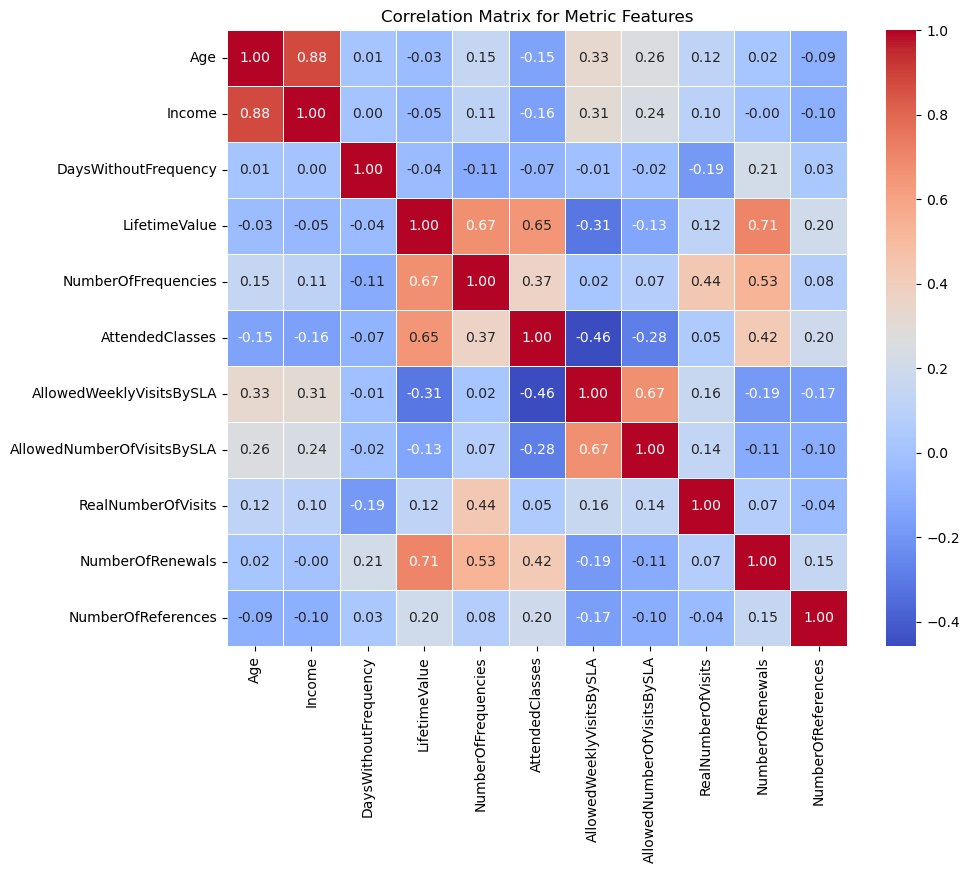

In [16]:
metric_correlation_matrix = df[metric_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for Metric Features")
plt.show()

#### Date Features

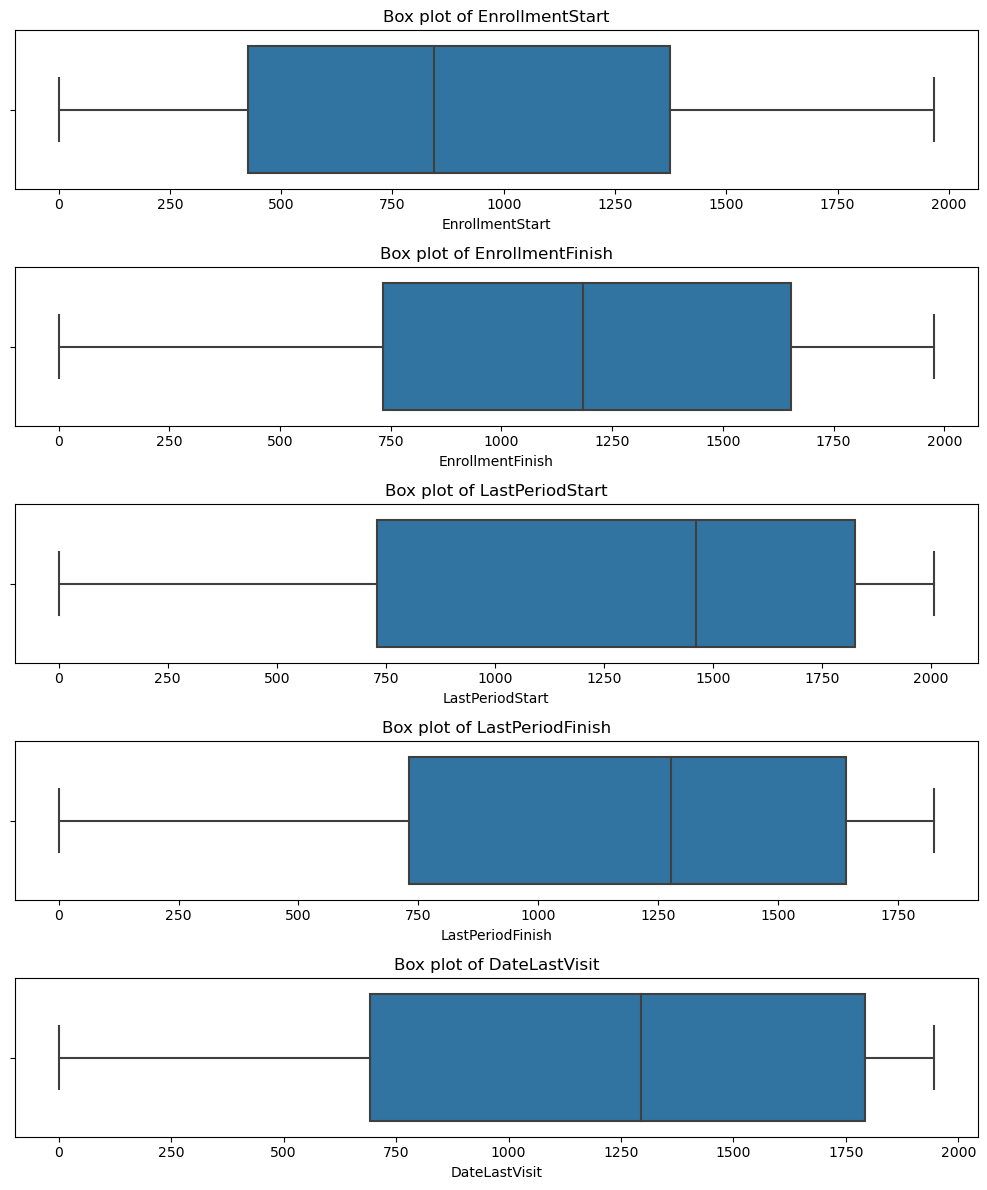

In [17]:
plt.figure(figsize=(10, 5 * len(date_features) // 2))  # Adjust the height by dividing it by 2

for i, feature in enumerate(date_features, 1):
    plt.subplot(len(date_features), 1, i)
    
    # Calculate time differences
    time_diff = (pd.to_datetime(df[feature]) - pd.to_datetime(df[feature]).min()).dt.days
    sns.boxplot(x=time_diff)
    
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

#### Analysis of categorical data

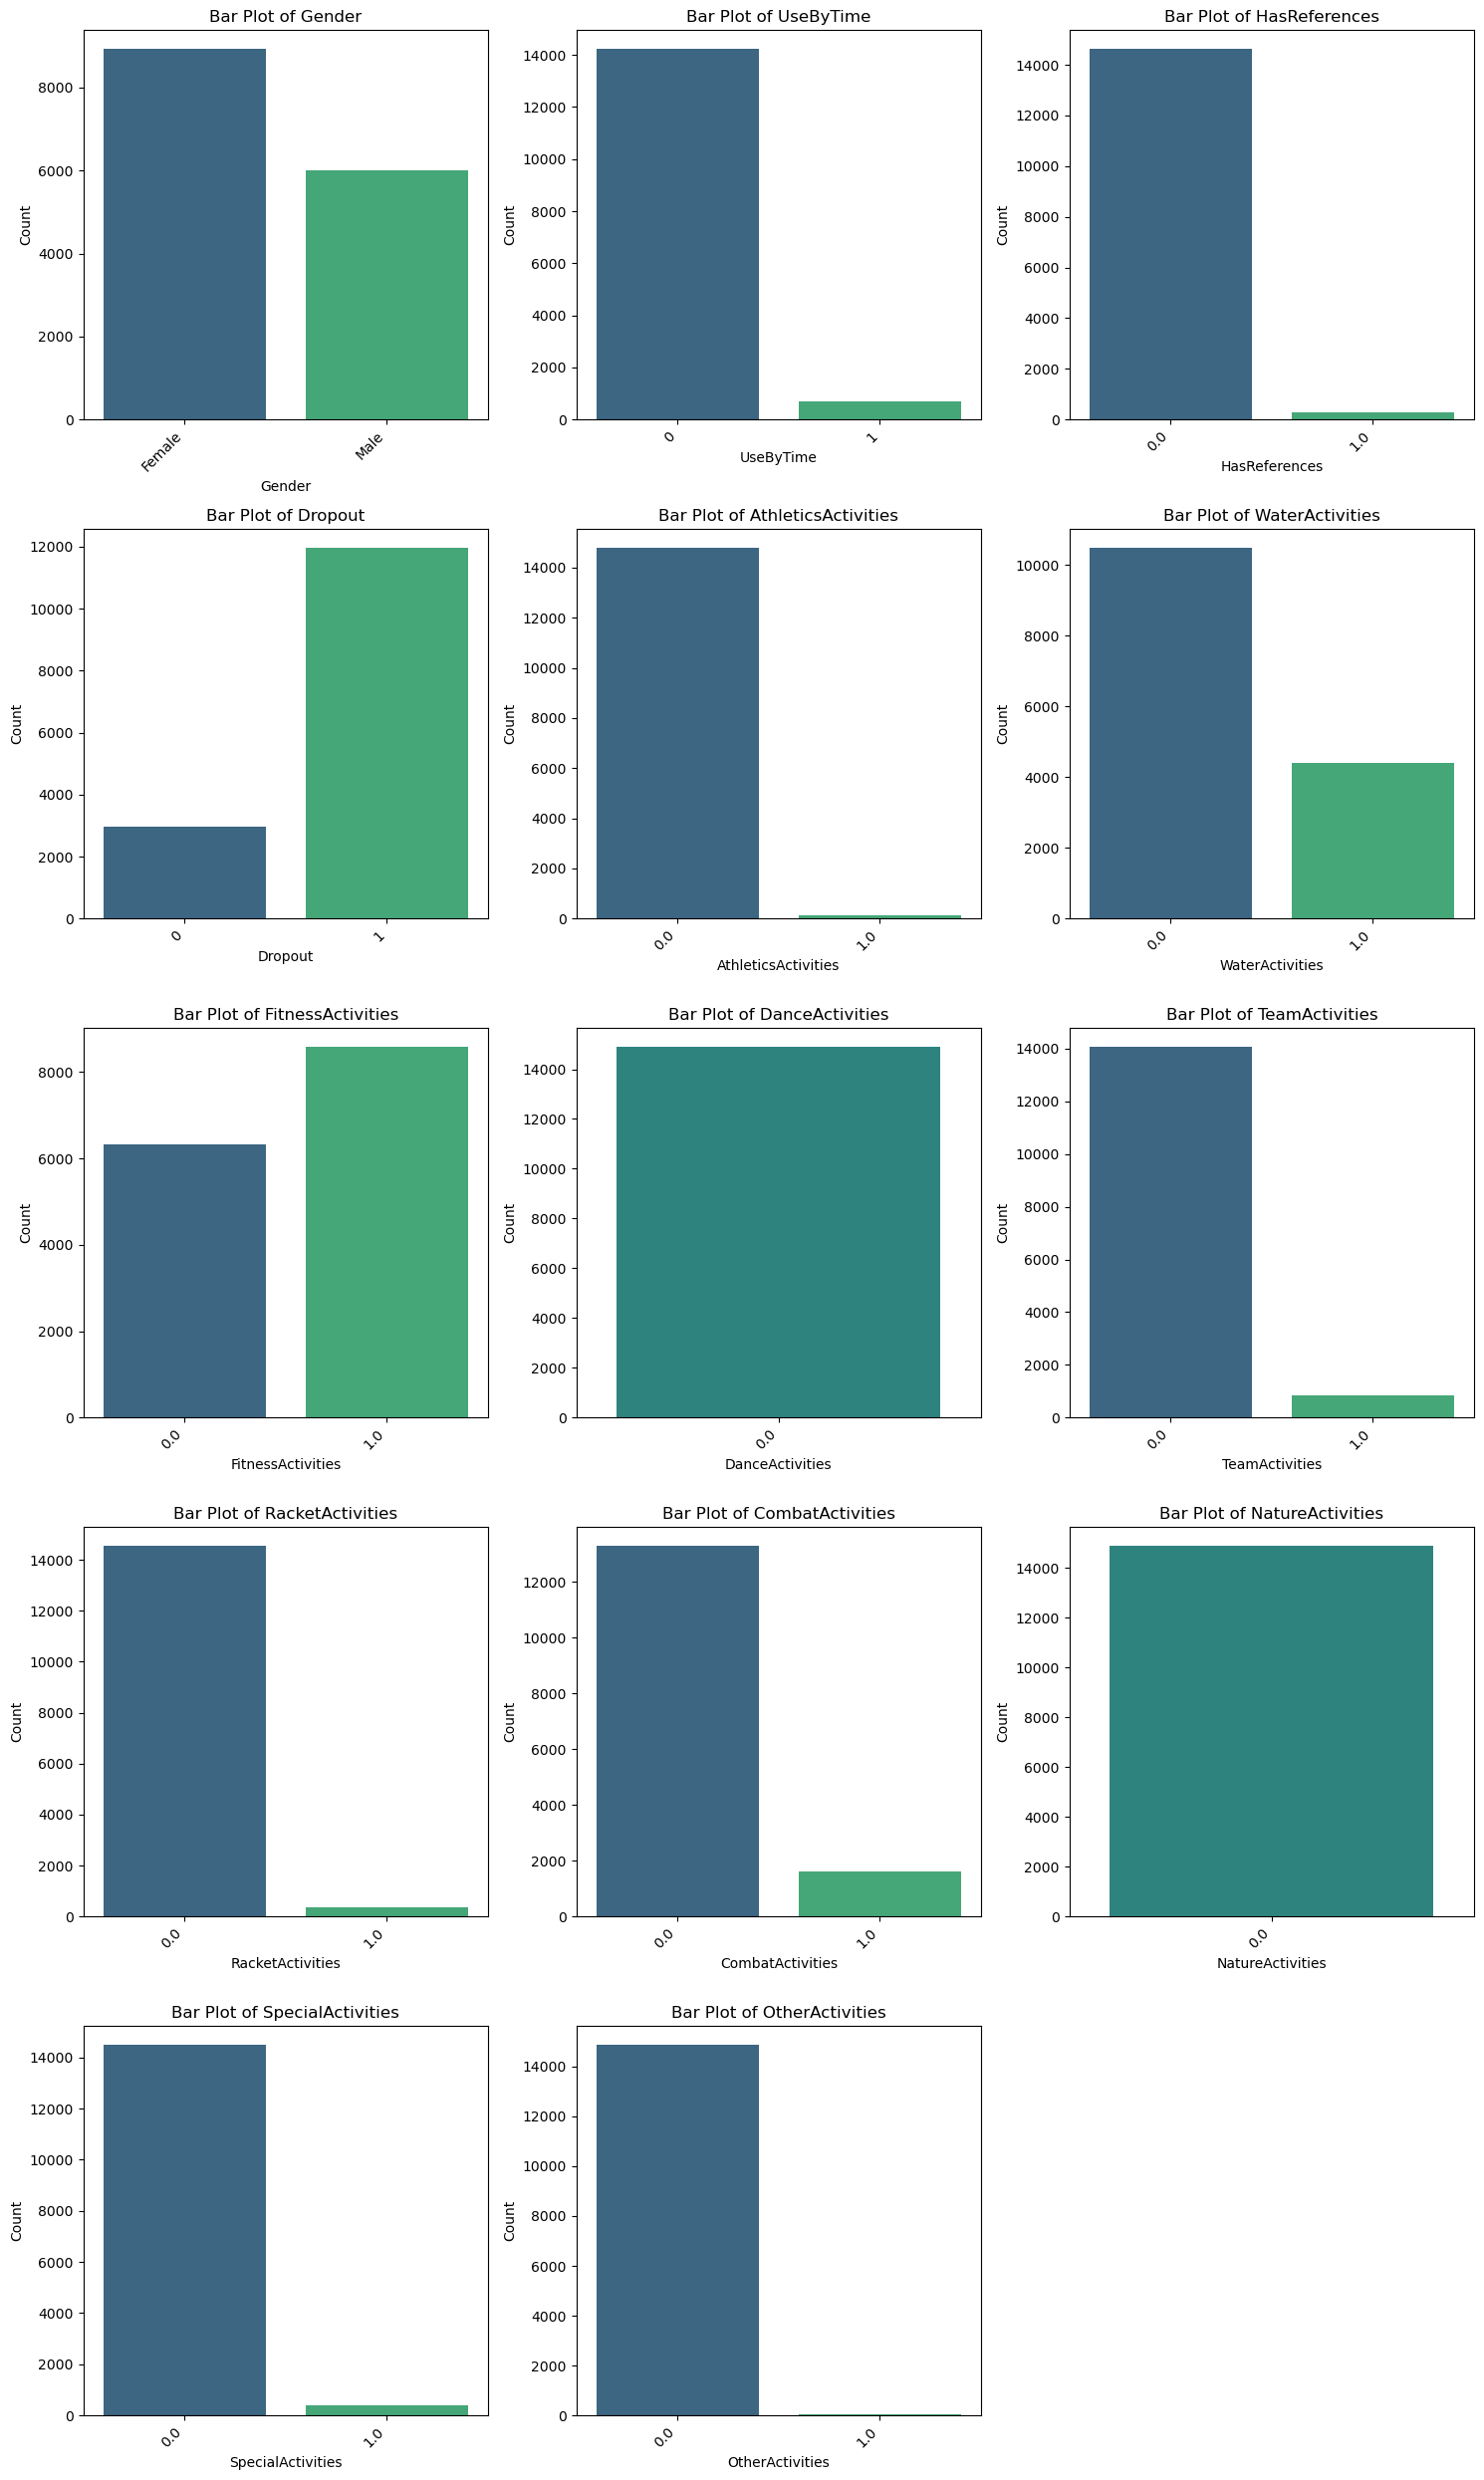

In [18]:
num_plots = len(non_metric_features)
num_cols = 3
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(non_metric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Just by looking at the plots we can see the features DanceActivities and NatureActivities are redundant

# 4. Data Pre-processing

In [19]:
df_processed = df.copy()

## 4.1 Removing duplicates

In [20]:
df_processed.duplicated().sum()

1

In [21]:
df_processed = df_processed.drop_duplicates()

In [22]:
df_processed.duplicated().sum()

0

## 4.2 Missing Values

**Regarding the missing values, we separate the process into three steps:**

1. Fill all NaN values from 'Activities' columns with 0;
2. Fix NaN in HasReferences, place 0 if NumberOfRenewals equal to 0 and 1 if different.
3. Remove rows with more than 1 missing value, if they're a small quantity;
4. Fill other features' NaNs with KNNImputer for metric features and Mode for non-metric features.


### NaN values from 'Activities' columns

In [23]:
Activities_features = df_processed.columns[df_processed.columns.str.contains('Activities')].tolist()
df_processed[Activities_features] = df_processed[Activities_features].fillna(value=0)

### Fix NaN in HasReferences, place 0 if NumberOfRenewals equal to 0 and 1 if different.

In [24]:
df_processed['HasReferences'] = df_processed.apply(lambda row: 0 if row['NumberOfRenewals'] == 0 else 1 if pd.isna(row['HasReferences']) else row['HasReferences'], axis=1)

### Checking for rows with more than 1 NaN values.

In [25]:
moreThan1NaNDataFrame=df_processed.loc[df_processed.isna().sum(axis=1) >= 2]
moreThan1NaNDataFrame.shape

(26, 30)

Since it's only 26 rows, we drop them.

In [26]:
df_processed.drop(index=moreThan1NaNDataFrame.index,inplace=True)

### Fill other features NaNs with KNNImputer for metric features and Modes for non-metric features.

#### KNNImputer Method

In [27]:
# Creating new df copy to explore neighbordhood imputation
df_neighbors = df_processed.copy()

In [28]:
# Checking rows with NaNs
nans_rows = df_neighbors.isna().any(axis=1)
df_neighbors[nans_rows].head(5)

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10019   28    Male  2510.0      2019-10-01       2019-10-31      2019-07-01   
10034   74  Female  5210.0      2019-10-01       2019-10-31      2019-07-01   
10068   43  Female     NaN      2016-09-16       2019-10-31      2019-07-01   
10076    9    Male     NaN      2017-09-16       2017-09-16      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10019       2019-12-31    2019-10-21                    10          52.00   
10034       2019-12-31    2019-10-11                    20          38.50   
10068       2019-12-31    2019-10-30                     1         849.80   
10076       2019-12-31    2019-10-26                     5         708.20   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10019  ...              0.0                  2.0                0   
10034  ...              0.0                  4.0                0   
10068  ...              0.0                214.0                0   
10076  ...              0.0                 64.0               64   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10019                       NaN                       24.01   
10034                       NaN                       30.03   
10068                       7.0                       21.98   
10076                       2.0                       17.42   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10019                   2                 0            0.0   
10034                   4                 0            0.0   
10068                   9                 3            0.0   
10076                   6                 2            0.0   

       NumberOfReferences  Dropout  
ID                                  
10000                   0        0  
10019                   0        0  
10034                   0        0  
10068                   0        1  
10076                   0        0  

[5 rows x 30 columns]

In [29]:
# KNNImputer 
imputer = KNNImputer(n_neighbors=10, weights="uniform")
df_neighbors[metric_features] = imputer.fit_transform(df_neighbors[metric_features])
df_processed = df_neighbors.copy()

### Rechecking for NaNs

In [30]:
df_processed.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

## 4.3 Coherence Checks and Assumptions

**EnrollmentStart and EnrollmentFinish Incoherences:**
  - We identified 2422 rows where `EnrollmentStart` was equal to `EnrollmentFinish`. Additionally, we found 2422 rows where `Dropout` was `False` and `EnrollmentFinish` was different than '2019-10-31', the last time the data was collected. Combining both conditions yielded the same 2422 rows. As a result, we assumed that `EnrollmentFinish` was incorrectly defined (should be '2019-10-31') when `EnrollmentStart` was equal to `EnrollmentFinish` and `Dropout` was `False`.
 
**UseByTime and Dropout Incoherence:**
  - When `UseByTime` is `True`, `Dropout` is always `True`. Consequently, we assumed that `Dropout` is automatically changed to `True`. Further, when `Dropout` was `True`, `UseByTime` was `True`, and `EnrollmentFinish` was equal to '2019-10-31', we assumed that the `Dropout` was wrongly defined in these cases.




### 4.3.1 EnrollmentStart and EnrollmentFinish Incoherences:

In [31]:
# Filter and print rows where enrolmentstart is equal to enrolmentfinish
equal_enrollment_rows = df_processed[df_processed['EnrollmentStart'] == df_processed['EnrollmentFinish']]
print(equal_enrollment_rows[['EnrollmentStart', 'EnrollmentFinish']])

      EnrollmentStart EnrollmentFinish
ID                                    
10025      2015-09-09       2015-09-09
10036      2014-10-02       2014-10-02
10038      2018-09-29       2018-09-29
10049      2018-09-03       2018-09-03
10051      2018-08-17       2018-08-17
...               ...              ...
24918      2014-12-10       2014-12-10
24919      2019-07-18       2019-07-18
24926      2018-10-08       2018-10-08
24937      2016-09-08       2016-09-08
24940      2018-03-01       2018-03-01

[2422 rows x 2 columns]


In [32]:
# Filter and print rows where dropout is False and enrolmentfinish is different than '2019-10-31'
filtered_rows = df_processed[(df_processed['Dropout'] == False) & (df_processed['EnrollmentFinish'] != '2019-10-31')]
print(filtered_rows[['Dropout', 'EnrollmentFinish']])

       Dropout EnrollmentFinish
ID                             
10025        0       2015-09-09
10036        0       2014-10-02
10038        0       2018-09-29
10049        0       2018-09-03
10051        0       2018-08-17
...        ...              ...
24918        0       2014-12-10
24919        0       2019-07-18
24926        0       2018-10-08
24937        0       2016-09-08
24940        0       2018-03-01

[2422 rows x 2 columns]


In [33]:
# Combine conditions and print rows
combined_rows = df_processed[((df_processed['EnrollmentStart'] == df_processed['EnrollmentFinish']) | 
                              ((df_processed['Dropout'] == False) & (df_processed['EnrollmentFinish'] != '2019-10-31')))]

print(combined_rows[['EnrollmentStart', 'EnrollmentFinish', 'Dropout']])


      EnrollmentStart EnrollmentFinish  Dropout
ID                                             
10025      2015-09-09       2015-09-09        0
10036      2014-10-02       2014-10-02        0
10038      2018-09-29       2018-09-29        0
10049      2018-09-03       2018-09-03        0
10051      2018-08-17       2018-08-17        0
...               ...              ...      ...
24918      2014-12-10       2014-12-10        0
24919      2019-07-18       2019-07-18        0
24926      2018-10-08       2018-10-08        0
24937      2016-09-08       2016-09-08        0
24940      2018-03-01       2018-03-01        0

[2422 rows x 3 columns]


**Assumption 1**

In [34]:
# Identify rows where EnrollmentStart is equal to EnrollmentFinish and Dropout is False
fix_condition = (df_processed['EnrollmentStart'] == df_processed['EnrollmentFinish']) & (df_processed['Dropout'] == False)

# Set EnrollmentFinish to '2019-10-31' for the identified rows
df_processed.loc[fix_condition, 'EnrollmentFinish'] = '2019-10-31'

### 4.3.2 UseByTime and Dropout Incoherence:

In [35]:
# Check conditions and identify rows where Dropout might be wrongly defined
wrong_dropout_rows = df_processed[
    (df_processed['UseByTime'] == True) & 
    (df_processed['Dropout'] == True) & 
    (df_processed['EnrollmentFinish'] == '2019-10-31')
]
print(wrong_dropout_rows[['UseByTime', 'Dropout', 'EnrollmentFinish']])

       UseByTime  Dropout EnrollmentFinish
ID                                        
10016          1        1       2019-10-31
10018          1        1       2019-10-31
10023          1        1       2019-10-31
10063          1        1       2019-10-31
10068          1        1       2019-10-31
...          ...      ...              ...
24540          1        1       2019-10-31
24564          1        1       2019-10-31
24708          1        1       2019-10-31
24893          1        1       2019-10-31
24895          1        1       2019-10-31

[182 rows x 3 columns]


**Assumption 2**

In [36]:
# Identify rows where UseByTime is True and Dropout is automatically assumed to be True
fix_condition = (df_processed['UseByTime'] == True)

# Set Dropout to False for the identified rows
df_processed.loc[fix_condition, 'Dropout'] = False

# Further, identify rows where Dropout is True, UseByTime is True, and EnrollmentFinish is '2019-10-31'
wrong_dropout_condition = (df_processed['Dropout'] == True) & (df_processed['UseByTime'] == True) & (df_processed['EnrollmentFinish'] == '2019-10-31')

# Set Dropout to False for the identified rows where it was wrongly defined
df_processed.loc[wrong_dropout_condition, 'Dropout'] = False

## 4.4 Outliers

### 4.4.1 Manual Filtering

In [37]:
filters1 = (
    ((df_processed['Age'] < 16) & (df_processed['Income'] != 0))  # if younger than 16 and has income, it's deleted
    |
    (df_processed['Income'] < 0)
    |
    (df_processed['LifetimeValue'] > 5000) 
    |
    (df_processed['AttendedClasses'] > 400) 
    |
    (df_processed['AllowedNumberOfVisitsBySLA'] > 100)  
    |
    (df_processed['RealNumberOfVisits'] > 60) 
    |
    (df_processed['NumberOfRenewals'] > 5)
)
# We decided what we didnt want in filters 1, so we will uptade it so the filter keeps the rows we want
filters1 = ~filters1 

In [38]:
df_processed_v1 = df_processed[filters1].copy()

print(f"Percentage of data deleted after removing outliers: {100-np.round((df_processed_v1.shape[0] / df_original.shape[0]) * 100, 4)}%")

Percentage of data deleted after removing outliers: 2.5297999999999945%


#### Checking Boxplots after outlier Manual Filtering

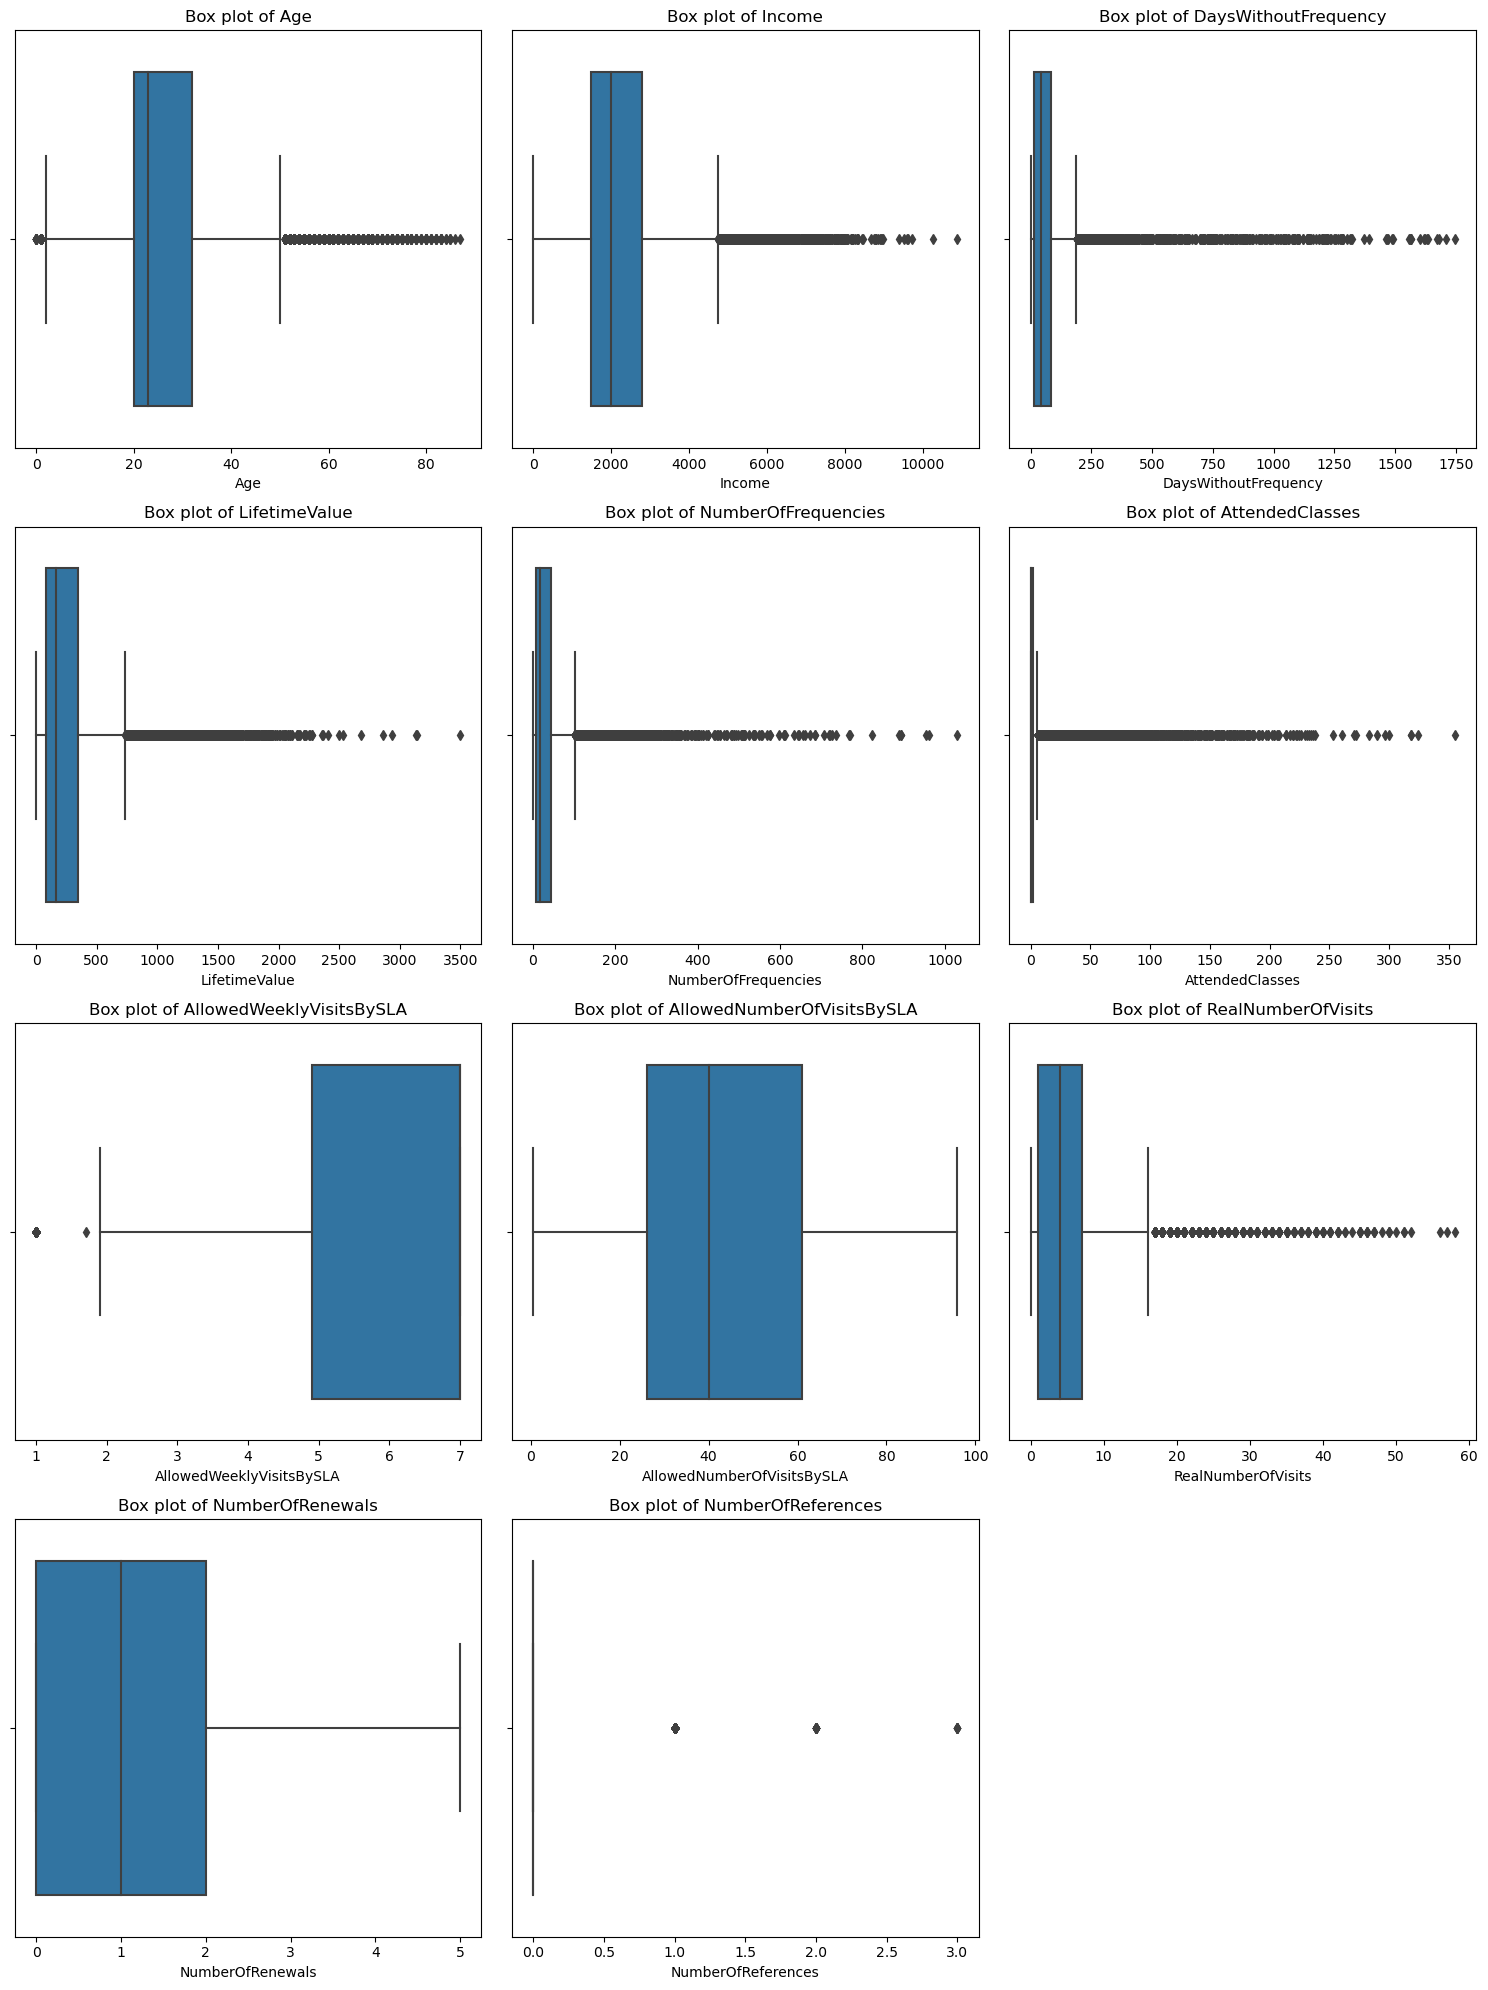

In [39]:
num_plots = len(metric_features)
num_cols = 3  
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(15, 5 * num_rows))  

for i, feature in enumerate(metric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df_processed_v1[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


### 4.4.2 IQR

In [40]:
q25 = df_processed[metric_features].quantile(.25)
q75 = df_processed[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df_processed[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))

In [41]:
# Resetting the index of df_processed
df_processed_reset = df_processed.reset_index(drop=True)

# Applying the boolean Series on the reset DataFrame
df_processed_v2 = df_processed_reset[filters2]

# Print percentage of data kept after removing outliers
print('Percentage of data deleted after removing outliers:', 100-(np.round(df_processed_v2.shape[0] / df_original.shape[0]* 100, 4)), "%")

Percentage of data deleted after removing outliers: 44.4853 %


### 4.4.3 Z-Score

In [42]:
filters3 = [True] * len(df_processed)

for col in metric_features:
    z_scores = np.abs(stats.zscore(df_processed[col]))
    
    # Update filters3 based on z-score criteria
    filters3 = np.logical_and(filters3, z_scores <= 3)

# Apply filters3 to the train DataFrame
df_processed_v3=df_processed[filters3]

print("Percentage of data deleted after removing outliers: ", 100-((df_processed_v3.shape[0] / df_original.shape[0]) * 100),"%")

Percentage of data deleted after removing outliers:  12.013117387230622 %


### 4.4.4 Combining different outlier methods

In [43]:
filters_combined = filters1 | filters2 | filters3 

# Ensure indices match before applying the boolean mask
filters_combined = filters_combined.reindex(df_processed.index)

df_processed_final = df_processed[filters_combined]
print(f"Percentage of data deleted after removing outliers: {100-np.round(df_processed_final.shape[0] / df_original.shape[0]*100, 4)}%")

Percentage of data deleted after removing outliers: 1.0909000000000049%


In [44]:
df=df_processed_final.copy()

## 4.5 Feature Engineering

### User Data Description

| No. | Name                      | Description                                                                                         |
|----:|---------------------------|-----------------------------------------------------------------------------------------------------|
|   0 | ID                        | Unique identifier of the record                                                                   |
|   1 | Age                       | Age of the user at October 31st, 2019, if it is not a dropout, or age at date specified in attribute EnrollmentFinish if it is a dropout |
|   2 | Gender                    | Gender of the user (Male or Female)                                                               |
|   3 | Income                    | Monthly salary of the user                                                                        |
|   4 | EnrollmentStart           | Date of first enrollment                                                                          |
|   5 | EnrollmentFinish          | Finish date of last enrollment                                                                    |
|   6 | LastPeriodStart           | Start date of the last activity or the last two months if less                                    |
|   7 | LastPeriodFinish          | End date of last activity or last two months if less                                              |
|   8 | DateLastVisit              | Date and time of the user’s last visit to the sport facility                                       |
|   9 | DaysWithoutFrequency      | Number of days the user did not visit the facility before being considered a dropout              |
|  10 | LifetimeValue              | Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish) |
|  11 | UseByTime                  | Indicates whether the user was enrolled in this form of use (True if he was, False otherwise)      |
|  12 | AthleticsActivities        | Indicates if the user was ever enrolled in athletics activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  13 | WaterActivities            | Indicates if the user was ever enrolled in water activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  14 | FitnessActivities          | Indicates if the user was ever enrolled in fitness activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  15 | DanceActivities            | Indicates if the user was ever enrolled in dance activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  16 | TeamActivities             | Indicates if the user was ever enrolled in team activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  17 | RacketActivities           | Indicates if the user was ever enrolled in racket activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  18 | CombatActivities           | Indicates if the user was ever enrolled in combat sports activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  19 | NatureActivities           | Indicates if the user was ever enrolled in nature activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  20 | SpecialActivities          | Indicates if the user was enrolled in sports for disabled people during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  21 | OtherActivities            | Indicates if the user was ever enrolled in other activities that do not fall into the other categories during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
|  22 | NumberOfFrequencies        | Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish |
|  23 | AttendedClasses            | Number of classes the user attended between EnrollmentStart and EnrollmentFinish                   |
|  24 | AllowedWeeklyVisitsBySLA   | Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish) |
|  25 | AllowedNumberOfVisitsBySLA | Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish) |
|  26 | RealNumberOfVisits         | The actual number of visits that the user made to the facilities in the last period of his registration (between LastPeriodStart and LastPeriodFinish) |
|  27 | NumberOfRenewals           | Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)    |
|  28 | HasReferences              | This field contains the value True if NumberOfReferences > 0, or False otherwise                    |
|  29 | NumberOfReferences         | Number of people with which the user is related by family relationship or friendship               |
|  30 | Dropout                    | Represents the user’s enrollment status, assuming the value True if he is quitting or False if he is not |


In [45]:
df.dtypes

Age                           float64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency          float64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses               float64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits            float64
NumberOfRene

In [46]:
df[date_features] = df[date_features].apply(pd.to_datetime, errors='coerce')

In [47]:
df[activity_features] = df[activity_features].astype(int)

In [48]:
df["Dropout"] = df["Dropout"].astype(int)
df["HasReferences"] = df["HasReferences"].astype(int)

In [49]:
features_list = [
    "Age",
    "DaysWithoutFrequency",
    "NumberOfFrequencies",
    "AttendedClasses",
    "AllowedWeeklyVisitsBySLA",
    "AllowedNumberOfVisitsBySLA",
    "RealNumberOfVisits",
    "NumberOfRenewals",
    "NumberOfReferences"
]

# Checking if values in each feature are not integers
non_integer_counts = {}
for feature in features_list:
    non_integer_rows = df[~df[feature].astype(float).apply(lambda x: x.is_integer())]
    num_non_integer_rows = len(non_integer_rows)
    non_integer_counts[feature] = num_non_integer_rows
    print(f"Number of rows where {feature} is not an integer: {num_non_integer_rows}")

# Display the overall counts
print("\nOverall counts:")
for feature, count in non_integer_counts.items():
    print(f"{feature}: {count}")


Number of rows where Age is not an integer: 0
Number of rows where DaysWithoutFrequency is not an integer: 0
Number of rows where NumberOfFrequencies is not an integer: 22
Number of rows where AttendedClasses is not an integer: 0
Number of rows where AllowedWeeklyVisitsBySLA is not an integer: 352
Number of rows where AllowedNumberOfVisitsBySLA is not an integer: 14398
Number of rows where RealNumberOfVisits is not an integer: 0
Number of rows where NumberOfRenewals is not an integer: 0
Number of rows where NumberOfReferences is not an integer: 0

Overall counts:
Age: 0
DaysWithoutFrequency: 0
NumberOfFrequencies: 22
AttendedClasses: 0
AllowedWeeklyVisitsBySLA: 352
AllowedNumberOfVisitsBySLA: 14398
RealNumberOfVisits: 0
NumberOfRenewals: 0
NumberOfReferences: 0


In [50]:
df["Age"] = df["Age"].astype(int)
df["DaysWithoutFrequency"] = df["DaysWithoutFrequency"].astype(int)
#df["NumberOfFrequencies"] = df["NumberOfFrequencies"].round().astype(int)
df["AttendedClasses"] = df["AttendedClasses"].astype(int)
#df["AllowedWeeklyVisitsBySLA"] = df["AllowedWeeklyVisitsBySLA"].round().astype(int)
#df["AllowedNumberOfVisitsBySLA"] = df["AllowedNumberOfVisitsBySLA"].round().astype(int)
df["RealNumberOfVisits"] = df["RealNumberOfVisits"].astype(int)
df["NumberOfRenewals"] = df["NumberOfRenewals"].astype(int)
df["NumberOfReferences"] = df["NumberOfReferences"].astype(int)


**Creating Feature MonthsEnrolled**

Indicates how long the user was enrolled in months

In [51]:
df['MonthsEnrolled'] = ((df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days/ 30)
metric_features.append('MonthsEnrolled')

**Creating Feature MonthsPerioded**

Indicates how long the user was in Period, in months

In [52]:
df['MonthsPerioded'] = ((df['LastPeriodFinish'] - df['LastPeriodStart']).dt.days/ 30)
metric_features.append('MonthsPerioded')

**Creating Feature AvgMonthlyValue**

Indicates the average amount of money spent per month per user

In [53]:
df['AvgMonthlyValue'] = (df['LifetimeValue'] / df['MonthsEnrolled'])
metric_features.append('AvgMonthlyValue')

**Creating Feature TotalOfActivities**

Indicates total amount of Activities the user is enrolled

In [54]:
df['TotalOfActivities'] = df[activity_features].sum(axis=1)
metric_features.append('TotalOfActivities')

**Creating Feature AvgMonthlyActivities**

Indicates Average Monthly Activities the user went to, per month.

In [55]:
df['AvgMonthlyActivities'] = (df['TotalOfActivities'] / df['MonthsEnrolled'])
metric_features.append('AvgMonthlyActivities')

**Creating Feature AvgMonthlyAttendance**

Indicates the average amount of attendances per month per user

In [56]:
df['AvgMonthlyAttendance'] = (df['NumberOfFrequencies'] / df['MonthsEnrolled'])
metric_features.append('AvgMonthlyAttendance')

**Creating Feature AvgMonthlyClasses**

Indicates Average Monthly Classes the user went to, per month.

In [57]:
df['AvgMonthlyClasses'] = (df['AttendedClasses'] / df['MonthsEnrolled'])
metric_features.append('AvgMonthlyClasses')

**Creating Feature RateOfAllowedVisitsUsed**

This feature represents the average rate of visits used relative to the total allowed visits.

In [58]:
df['RateOfAllowedVisitsUsed'] = (df['RealNumberOfVisits'] / df['AllowedNumberOfVisitsBySLA'])
metric_features.append('RateOfAllowedVisitsUsed')

### Encoding Data

Since the only categorical feature we have is Gender. We will use a simple enconding.

Creating feature isMale which indicates if the client is Male (isMale=True) or Female (isMale=False) 

In [59]:
# Create a new column 'isMale' based on 'Gender'
df['isMale'] = (df['Gender'] == 'Male').astype(int)
non_metric_features.append("isMale")

# Drop the original 'Gender' column if you no longer need it
df = df.drop('Gender', axis=1)
non_metric_features.remove("Gender")
df["isMale"] = df["isMale"].astype(int)

### Looking at the Data Types after changes 

In [60]:
df.dtypes

Age                                    int32
Income                               float64
EnrollmentStart               datetime64[ns]
EnrollmentFinish              datetime64[ns]
LastPeriodStart               datetime64[ns]
LastPeriodFinish              datetime64[ns]
DateLastVisit                 datetime64[ns]
DaysWithoutFrequency                   int32
LifetimeValue                        float64
UseByTime                              int64
AthleticsActivities                    int32
WaterActivities                        int32
FitnessActivities                      int32
DanceActivities                        int32
TeamActivities                         int32
RacketActivities                       int32
CombatActivities                       int32
NatureActivities                       int32
SpecialActivities                      int32
OtherActivities                        int32
NumberOfFrequencies                  float64
AttendedClasses                        int32
AllowedWee

## 4.6 Feature Selection

### Redundancy VS Relevancy

#### Redundancy

##### Metric Features

locator: <matplotlib.ticker.AutoLocator object at 0x00000149D8667450>


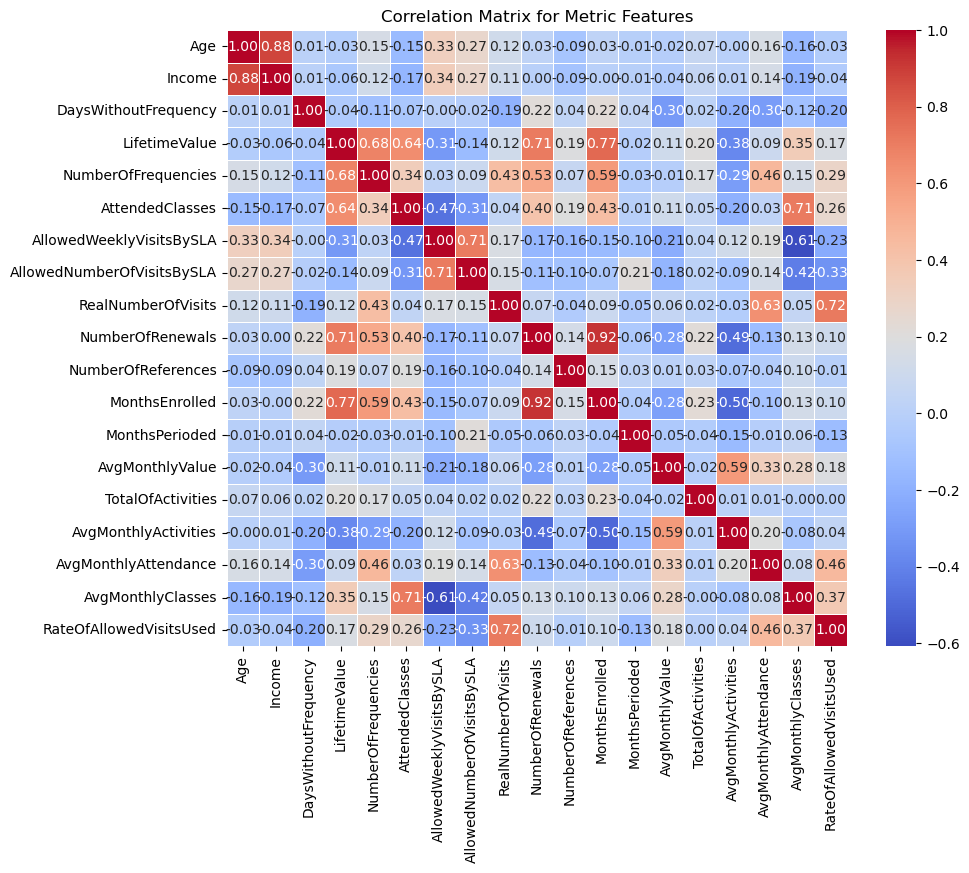

In [61]:
metric_correlation_matrix = df[metric_features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for Metric Features")
plt.show()

- We opted to exclude the "Income" feature from our analysis in favor of keeping the "Age" feature. The rationale behind this choice is the potential presence of clients who are under 18 years old. In such cases, using "Income" as a metric for analysis might not be meaningful, as individuals under 18 are unlikely to have a significant income. Therefore, we prioritize using "Age" as a more relevant and informative metric for our analysis of gym clients.

- We decided to exclude the 'LifetimeValue' feature from our analysis in favor of retaining the 'MonthsEnrolled' feature. This decision was driven by the fact that we have already created a new feature called 'AngMontlyValue,' which is derived from 'LifetimeValue' and better aligns with our analytical goals.

- We made the decision to omit the 'NumberOfRenewals' feature from our analysis due to its high correlation with the 'MonthsEnrolled' feature. We believe that focusing on the 'MonthsEnrolled' feature is more pertinent for our current stage of analysis, and we intend to delve into the 'NumberOfRenewals' feature at a later phase in the project.

- We chose to exclude "AllowedWeeklyVisitsBySLA" from our analysis in favor of keeping "AllowedNumberOfVisitsBySLA." The decision was driven by the belief that knowing the total number of allowed visits is more relevant than knowing only the allowed visits per week. By focusing on the overall permitted visits, we aim to capture a more comprehensive view of the user's access to the facilities based on their service agreement.

- We Dropped "RealNumberOfVisits" because of its high correlation with the feature we created "RateOfAllowedVisitsUsed".

- Finally, we Dropped "AttendedClasses" because of its high correlation with the feature we created "AvgMonthlyClasses".

In [62]:
# Select variables according to their correlations
metric_features_to_drop=["Income","LifetimeValue","NumberOfRenewals",
                         "AllowedWeeklyVisitsBySLA","RealNumberOfVisits","AttendedClasses"]

##### Non Metric Features

By looking at the variances, we will decide if they are redundant or not. If they have values under 0.1, they will be dropped.

In [63]:
df[non_metric_features].var()

UseByTime              0.044940
HasReferences          0.017088
Dropout                0.183605
AthleticsActivities    0.007255
WaterActivities        0.206455
FitnessActivities      0.243787
DanceActivities        0.000000
TeamActivities         0.051626
RacketActivities       0.022930
CombatActivities       0.096017
NatureActivities       0.000000
SpecialActivities      0.024989
OtherActivities        0.001891
isMale                 0.240463
dtype: float64

In [64]:
non_metric_features_to_drop=["AthleticsActivities","UseByTime","HasReferences",
                             "DanceActivities","TeamActivities","RacketActivities",
                             "CombatActivities","NatureActivities","SpecialActivities","OtherActivities"]

#### Relevancy
Selecting variables based on the relevancy of each one to the task. 


We are removing features such as "AllowedNumberOfVisitsBySLA," "NumberOfFrequencies," and "TotalOfActivities" because we have generated more suitable features based on them.

Additionally, features like "DaysWithoutFrequency," "MonthsPerioded," "WaterActivities," and "FitnessActivities" are being dropped as we believe they may not be pertinent for the clustering analysis we are conductin

Later on, we will also drop the DateFeatures because we have already extracted the essential information from them.g.

In [65]:
metric_features_to_drop.extend(["AllowedNumberOfVisitsBySLA","DaysWithoutFrequency","NumberOfFrequencies",
                                "MonthsPerioded","TotalOfActivities"])
non_metric_features_to_drop.extend(["WaterActivities", "FitnessActivities"])

In [66]:
df_not_dropped=df.copy()

### Dropping Features

In [67]:
old_metric_features=metric_features
# Updating metric_features
for feature in metric_features_to_drop:
    if feature in metric_features:
        metric_features.remove(feature)

# Display the updated metric_features list
print("Updated metric_features:\n", df[metric_features].dtypes)

Updated metric_features:
 Age                          int32
NumberOfReferences           int32
MonthsEnrolled             float64
AvgMonthlyValue            float64
AvgMonthlyActivities       float64
AvgMonthlyAttendance       float64
AvgMonthlyClasses          float64
RateOfAllowedVisitsUsed    float64
dtype: object


In [68]:
old_non_metric_features=non_metric_features
# Updating non_metric_features
for feature in non_metric_features_to_drop:
    if feature in non_metric_features:
        non_metric_features.remove(feature)

# Display the updated non_metric_features list
print("Updated non_metric_features:\n", df[non_metric_features].dtypes)

Updated non_metric_features:
 Dropout    int32
isMale     int32
dtype: object


In [69]:
df = df.drop(columns=metric_features_to_drop + non_metric_features_to_drop + date_features)
features_kept = df.columns.tolist()
print("The features kept are:", features_kept)

The features kept are: ['Age', 'NumberOfReferences', 'Dropout', 'MonthsEnrolled', 'AvgMonthlyValue', 'AvgMonthlyActivities', 'AvgMonthlyAttendance', 'AvgMonthlyClasses', 'RateOfAllowedVisitsUsed', 'isMale']


## 4.7 Data Normalization

In [70]:
scaler = MinMaxScaler()
df[metric_features] = scaler.fit_transform(df[metric_features])
df

Age  NumberOfReferences  Dropout  MonthsEnrolled  AvgMonthlyValue  \
ID                                                                              
10000  0.689655                 0.0        0        0.025394         0.101896   
10001  0.333333                 0.0        1        0.198070         0.079639   
10002  0.264368                 0.0        1        0.011173         0.082901   
10003  0.103448                 0.0        1        0.077197         0.064242   
10004  0.402299                 0.0        1        0.391061         0.031729   
...         ...                 ...      ...             ...              ...   
24937  0.160920                 0.0        0        0.578974         0.084146   
24938  0.448276                 0.0        1        0.128492         0.087140   
24939  0.229885                 0.0        1        0.011173         0.096129   
24940  0.632184                 0.0        0        0.305231         0.085651   
24941  0.367816                 0.0        1        0.588116         0.052166   

       AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
ID                                                                     
10000              0.091954              0.216653           0.241379   
10001              0.013400              0.080213           0.005025   
10002              0.177778              0.279459           0.000000   
10003              0.033333              0.174380           0.025000   
10004              0.006855              0.073082           0.000000   
...                     ...                   ...                ...   
24937              0.004646              0.135936           0.167247   
24938              0.020434              0.305225           0.000000   
24939              0.177778              0.279459           0.000000   
24940              0.008758              0.424855           0.509031   
24941              0.004574              0.202317           0.001715   

       RateOfAllowedVisitsUsed  isMale  
ID                                      
10000                 0.125374       0  
10001                 0.022599       0  
10002                 0.078656       1  
10003                 0.066649       1  
10004                 0.000000       1  
...                        ...     ...  
24937                 0.090396       1  
24938                 0.019371       1  
24939                 0.104875       1  
24940                 0.173643       1  
24941                 0.083939       0  

[14779 rows x 10 columns]

## 4.8 Segmentation

In [71]:
segment_demographics = ['Age', 'isMale']

segment_financial = ["NumberOfReferences","Dropout","MonthsEnrolled","AvgMonthlyValue"]

segment_attendances = ["AvgMonthlyActivities","AvgMonthlyAttendance", "AvgMonthlyClasses","RateOfAllowedVisitsUsed"]


# Creating final segmented datasets
df_demographics = df[segment_demographics].copy()
df_financial = df[segment_financial].copy()
df_attendances = df[segment_attendances].copy()

# 5. Modelling (Clustering)

**Models that will be used:**
- Hierarchical Clustering
- K-means 
- SOMs
- DBSCAN
- GMM (Gaussian Mixture Model )

## 5.1 Demographics Features Clustering

**Code for K-Means and Hierarchical Clustering Plots**

In [72]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst

def get_r2_scores(df, clusterer, min_k=2, max_k=16):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

def plot_r2_hierarchical_methods(df, link_methods, max_nclus, labels_name, dist="euclidean"):
    r2_hc_methods = np.vstack(
        [
            calc_r2_hierarchical_clustering(df, link, max_nclus, dist)
            for link in link_methods
        ]
    ).T

    r2_hc_methods_df = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=link_methods)

    sns.set()
    fig = plt.figure(figsize=(11, 5))
    sns.lineplot(data=r2_hc_methods_df, linewidth=2.5, markers=["o"] * len(link_methods))
    fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_nclus + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)
    plt.show()


**Code to plot the Dendrogram**

In [140]:
def plot_dendrogram(data, y_threshold=1, linkage_method="ward", metric='euclidean'):
    """
    Plots a dendrogram for hierarchical clustering.

    Parameters:
    - data: The input data for clustering.
    - y_threshold: The color threshold for clustering.
    - linkage_method: The linkage method (e.g., "ward").
    - metric: The distance metric (e.g., "euclidean").
    """
    sns.set()

    # Perform hierarchical clustering
    hclust_result = linkage(data, method=linkage_method, metric=metric)

    # Create the linkage matrix with the correct format
    linkage_matrix = np.column_stack([hclust_result[:, :2], hclust_result[:, 2], np.arange(2, 2 + hclust_result.shape[0])]).astype(float)

    # Plot the dendrogram
    fig = plt.figure(figsize=(11, 5))
    dendrogram(linkage_matrix,
               truncate_mode='level',
               labels=data.index, p=5,
               color_threshold=y_threshold,
               above_threshold_color='k')

    plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
    plt.title(f'Hierarchical Clustering - {linkage_method.title()}\'s Dendrogram', fontsize=21)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)')
    plt.ylabel(f'Euclidean Distance', fontsize=13)
    plt.show()



**Code for Intertia and Silhouette Plots**

In [74]:
def inertia_and_silhouette_plots(data, min_clusters, max_clusters):
    inertias = []
    silhouette_scores = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
        labels = kmeans.fit_predict(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plotting
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(np.arange(min_clusters, max_clusters + 1), inertias, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(np.arange(min_clusters, max_clusters + 1), silhouette_scores, marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

**Code for DBSCAN**

In [75]:
# K-distance graph to find out the right eps value
def plot_k_distance_graph(dataframe, n_neighbors=15):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    neigh.fit(dataframe)
    distances, _ = neigh.kneighbors(dataframe)
    distances = np.sort(distances[:, -1])
    plt.plot(distances)
    plt.title('K-Distance Graph')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# DBSCAN clustering
def apply_dbscan(dataframe, eps=1.0, min_samples=20, n_jobs=4):
    if eps is None:
        # If eps is not provided, use the heuristic method to determine epsilon
        neigh = NearestNeighbors(n_neighbors=min_samples)
        neigh.fit(dataframe)
        distances, _ = neigh.kneighbors(dataframe)
        distances = np.sort(distances[:, -1])
        eps = np.percentile(distances, 80)  # You can adjust the percentile as needed

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
    labels = dbscan.fit_predict(dataframe)
    n_clusters = len(np.unique(labels))
    print(f"Number of estimated clusters: {n_clusters}")
    return labels

# Count the points in each cluster
def count_cluster_points(labels):
    counter = Counter(labels)
    print("Number of points in each cluster:")
    for cluster, count in counter.items():
        print(f"Cluster {cluster}: {count}")


**Code for SOMs**

In [76]:
def plot_component_planes(weights, features, M=3, N=4, figsize=(20,20), figlayout=(3,4), title="Component Planes", cmap=cm.magma):
    xx, yy = np.meshgrid(np.arange(N), np.arange(M))
    xx = xx.astype(float)
    yy = yy.astype(float)
    xx[::-2] -= 0.5
    xx = xx
    yy = yy
    weights_ = np.flipud(np.flip(weights.reshape((M, N, len(features))), axis=1))
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    subfigs = fig.subfigures(figlayout[0], figlayout[1], wspace=.15)
    ## Normalize color scale to range of all values
    colornorm = mpl_colors.Normalize(vmin=np.min(weights),vmax=np.max(weights))
    for cpi, sf in zip(range(len(features)), subfigs.flatten()):
        sf.suptitle(features[cpi], y=0.95, fontsize=14)
        axs = sf.subplots(1,1, )
        axs.set_aspect('equal')
        ## Normalize color scale to range of values in each component
        colornorm = mpl_colors.Normalize(vmin=np.min(weights_[:,:,cpi]), 
                                         vmax=np.max(weights_[:,:,cpi]))
        # iteratively add hexagons
        for i in range(weights_.shape[0]):
            for j in range(weights_.shape[1]):
                wy = yy[(i, j)] * np.sqrt(3) / 2
                hexagon = RegularPolygon((xx[(i, j)], wy), numVertices=6, radius=.99 / np.sqrt(3),
                                     facecolor=cmap(colornorm(weights_[i, j, cpi])), alpha=1, linewidth=.5,
                                     edgecolor=cmap(colornorm(weights_[i, j, cpi])))
                axs.add_patch(hexagon)
        ## Add colorbar directly into the figure
        cax = sf.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these values for colorbar position
        cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=colornorm, orientation='vertical')
        ## Remove axes for hex plot
        axs.margins(.05)
        axs.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.show()


**Code for Comparing Models**

In [77]:
def compare_models(models_dict, cluster_column='cluster_labels'):
    scores = []
    n_clusters = []
    
    model_names = list(models_dict.keys())
    
    for modelName, modelDataframe in models_dict.items():
        scores.append(r2(modelDataframe, cluster_column))
        n_clusters.append(len(np.unique(modelDataframe[cluster_column])))
        
    sns.set()
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_size_inches(22.2, 15)  # Increase figure size by 20%
    
    x = np.arange(len(scores))  # the label locations
    
    width = 0.20  # the width of the bars
    
    ax1.set_facecolor("white")
    for i, (score, model_name) in enumerate(zip(scores, model_names)):
        ax1.bar(x[i] - width/2, score, width, label=model_name)
    
    ax1.set_ylim(0.0, 1.0)
    ax1.set_ylabel('Scores', fontsize=18)  # Increase font size for the ylabel
    ax1.set_title('R-Squared score by Model', fontsize=20)  # Increase font size for the title
    ax1.set_xticks(x)
    ax1.set_xticklabels([])
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increase font size for the legend
    
    ax2.set_facecolor("white")
    for i, (cluster, model_name) in enumerate(zip(n_clusters, model_names)):
        ax2.bar(x[i] - width/2, cluster, width, label=model_name)
    
    ax2.set_ylabel('Clusters', fontsize=18)  # Increase font size for the ylabel
    ax2.set_title('Number of Clusters by Model', fontsize=20)  # Increase font size for the title
    ax2.set_xticks(x)
    ax2.set_xticklabels([])
    ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increase font size for the legend
    
    plt.show()


**Code to Remove some annoying Warnings**

In [78]:
# Suppress font-related warnings from Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

**Clusters Profiles**

In [79]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

**Functions for clusters analysis**

In [80]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

### 5.1.1 Finding the optimal clusterer on demographic variables
**K-means and Hierarchical clustering**

In [81]:
# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_demographics, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_demographics, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2   0.901382  0.901382  0.901382  0.901382  0.901382
3   0.939581  0.926246  0.930860  0.901626  0.936910
4   0.964456  0.953616  0.950576  0.901626  0.961812
5   0.973694  0.956835  0.966694  0.902166  0.971929
6   0.980571  0.975069  0.976901  0.903742  0.978571
7   0.986598  0.981727  0.977667  0.907463  0.984885
8   0.990497  0.982423  0.978533  0.913875  0.989238
9   0.992483  0.989631  0.986221  0.919191  0.991693
10  0.993681  0.989756  0.991737  0.919540  0.992883
11  0.994705  0.990810  0.992205  0.922981  0.994005
12  0.995393  0.992645  0.993458  0.946979  0.994754
13  0.995956  0.993725  0.993570  0.947420  0.995406
14  0.996458  0.994433  0.994386  0.947552  0.995998
15  0.996886  0.994495  0.995175  0.953412  0.996540

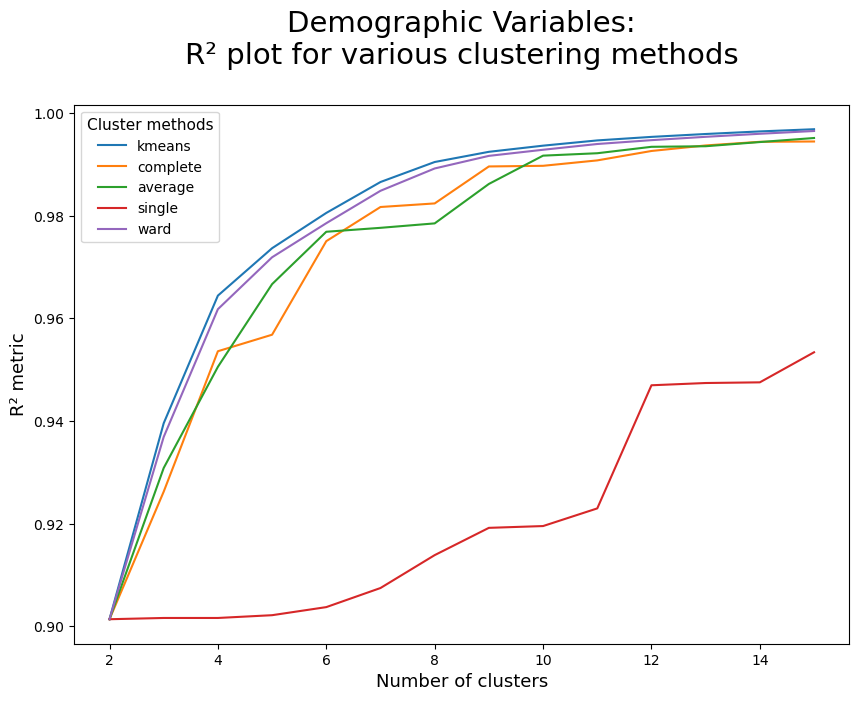

In [82]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

**K-Means is the best model, lets find the number of clusters**

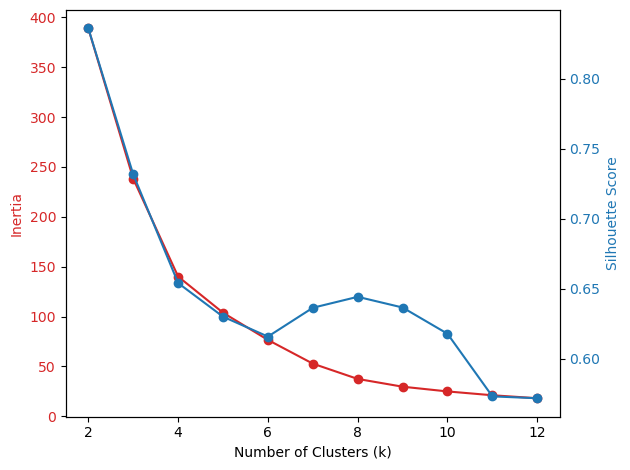

In [83]:
inertia_and_silhouette_plots(df_demographics[segment_demographics],2,12)

**K-Means with 4 clusters seems like the best option**

In [84]:
# Creating a copy of the demographic dataframe for K-Means clustering
df_demographic_KM = df_demographics.copy()

# Applying K-Means clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
df_demographic_KM['cluster_labels'] = kmeans_model.fit_predict(df_demographic_KM[segment_demographics])

# Calculating the mean values for each cluster
cluster_means = df_demographic_KM.groupby('cluster_labels').mean()
cluster_means


Age  isMale
cluster_labels                  
0               0.546746     0.0
1               0.227425     1.0
2               0.539640     1.0
3               0.233361     0.0

In [85]:
df_demographics_final = df_demographic_KM.copy()

## 5.2 Financial Features Clustering

### 5.2.1 K-means and Hierarchical clustering

In [86]:
# Set up the clusters
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

# Obtaining the R² scores for each cluster solution on financial variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_financial, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_financial, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2   0.809912  0.809912  0.809912  0.809912  0.809912
3   0.877296  0.853048  0.810197  0.810197  0.876981
4   0.936933  0.858316  0.811042  0.810813  0.935130
5   0.950282  0.859836  0.813741  0.811276  0.945568
6   0.961068  0.860665  0.821695  0.812120  0.954955
7   0.967418  0.923718  0.868876  0.815124  0.964135
8   0.972820  0.924026  0.869083  0.819722  0.969491
9   0.976656  0.924841  0.869921  0.819843  0.974541
10  0.979304  0.949551  0.870540  0.827863  0.976957
11  0.981900  0.949673  0.870576  0.827874  0.979292
12  0.983986  0.951269  0.932917  0.828069  0.981504
13  0.985865  0.955764  0.934554  0.828142  0.983621
14  0.987178  0.956216  0.934656  0.828183  0.985473
15  0.988100  0.956707  0.938295  0.828200  0.986803

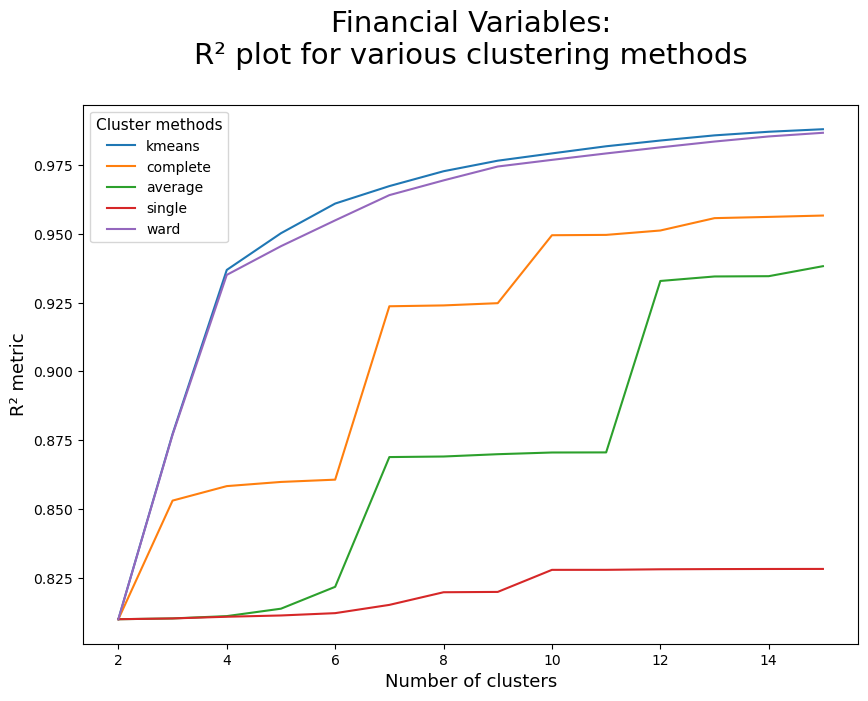

In [87]:
# Visualizing the R² scores for each cluster solution on financial variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Financial Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

**K-Means is the best model, lets find the number of clusters**

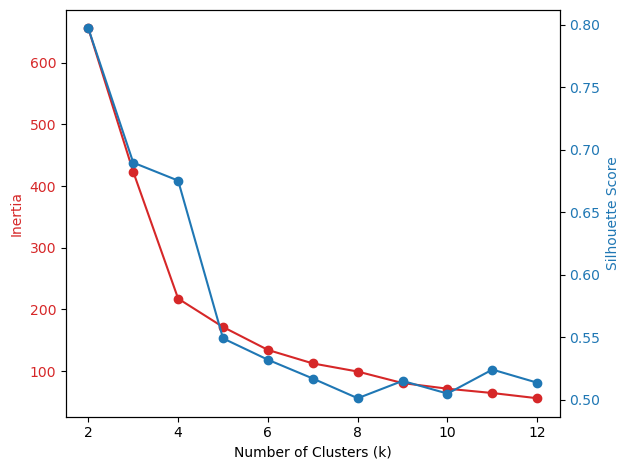

In [88]:
inertia_and_silhouette_plots(df_financial[segment_financial],2,12)

**K-Means with 4 Clusters seems like the best option**

In [89]:
# Creating a copy of the financial dataframe for K-Means clustering
df_financial_KM = df_financial.copy()

# Applying K-Means clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
df_financial_KM['cluster_labels'] = kmeans_model.fit_predict(df_financial_KM[segment_financial])

# Calculating the mean values for each cluster
cluster_means = df_financial_KM.groupby('cluster_labels').mean()
cluster_means


NumberOfReferences  Dropout  MonthsEnrolled  AvgMonthlyValue
cluster_labels                                                              
0                         0.004288      1.0        0.104062         0.056174
1                         0.018094      0.0        0.681245         0.045807
2                         0.001943      0.0        0.172242         0.072949
3                         0.018360      1.0        0.489787         0.041710

### 5.2.2 SOMs (Self Organizing Maps)

In [90]:
# Setting a random seed for reproducibility
np.random.seed(42)


# Creating a Self-Organizing Map (SOM) using the SOMFactory for financial data
som_financial = sompy.SOMFactory().build(
    data=df_financial.values, 
    mapsize=[50, 50],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=segment_financial
)

# Training the SOM with batch training
som_financial.train(n_job=-1, verbose=None, train_rough_len=50, train_finetune_len=50)


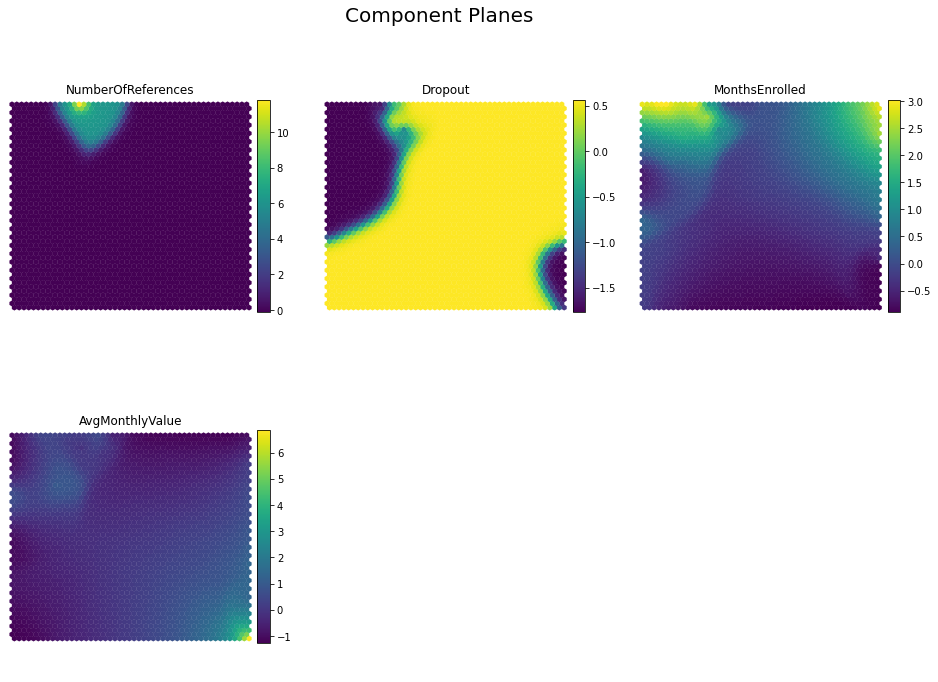

In [91]:
# Plotting component planes with feature names
plt.rcParams['figure.dpi'] = 72
view2D = sompy.visualization.mapview.View2D(12, 12, "", text_size=10)
view2D.show(som_financial, col_sz=3, what='codebook')

plt.subplots_adjust(top=0.9)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

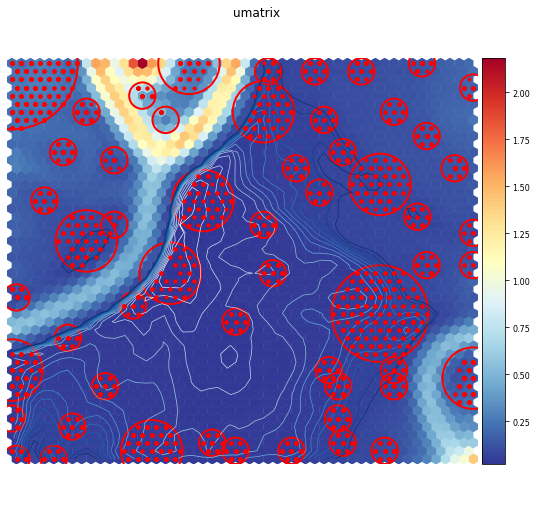

In [92]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    som_financial, 
    distance=2, 
    row_normalized=False, 
    show_data=False, 
    contour=True, # Visualize isomorphic curves
    blob=True
)


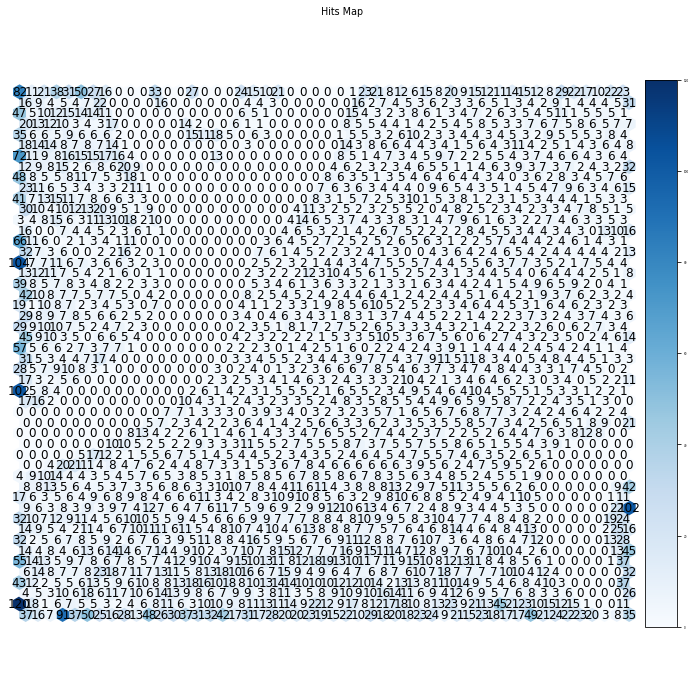

In [93]:
# Show the frequency of each Unit in the output map
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(som_financial, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

**Hierarchical Clustering on top of SOM units**

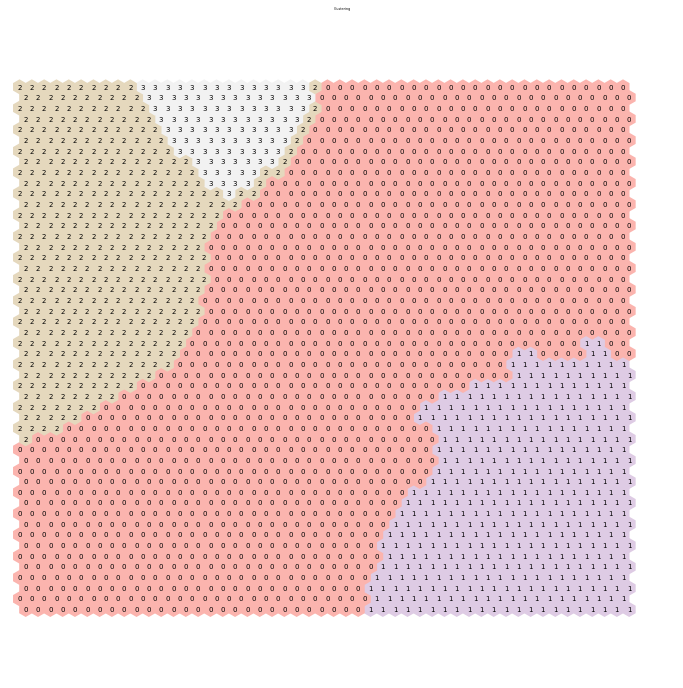

In [94]:
# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(som_financial.codebook.matrix)
som_financial.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(som_financial, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

**K-Means on top of SOM units**

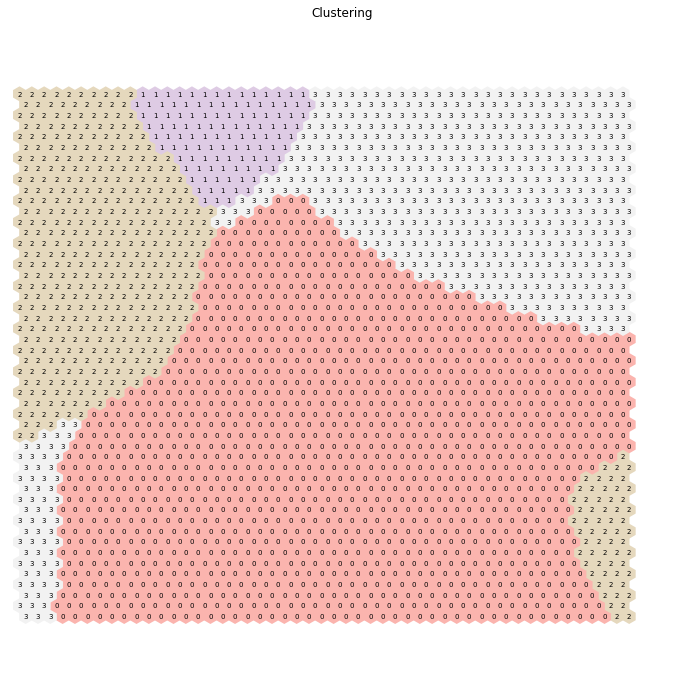

In [95]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(som_financial.codebook.matrix)
som_financial.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(som_financial, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

**Final SOM Clustering solution**

In [96]:
# Create a copy of the original financial DataFrame
df_financial_som_final = df_financial.copy()

# Extract cluster labels using best matching units from the Self-Organizing Map
data_labels = np.array([nodeclus_labels[int(k)] for k in som_financial._bmu[0]]) 

# Assign the extracted cluster labels to a new column in the DataFrame
df_financial_som_final['cluster_labels'] = data_labels

# Group the DataFrame by cluster labels and calculate the mean for each cluster
cluster_means = df_financial_som_final.groupby('cluster_labels').mean()
cluster_means

NumberOfReferences   Dropout  MonthsEnrolled  AvgMonthlyValue
cluster_labels                                                               
0                          0.00000  1.000000        0.088865         0.061220
1                          0.37578  0.741573        0.462053         0.058966
2                          0.00000  0.001989        0.331831         0.064610
3                          0.00000  1.000000        0.368493         0.032816

### 5.2.3 DBSCAN

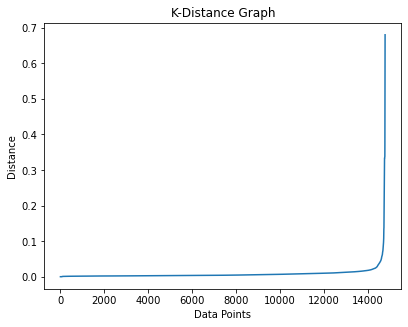

In [97]:
# Plot K-distance graph
plot_k_distance_graph(df_financial[segment_financial])


In [98]:
# Apply DBSCAN clustering
df_financial_DBSCAN = df_financial.copy()
labels_dbscan = apply_dbscan(df_financial[segment_financial],eps=0.05)
df_financial_DBSCAN['cluster_labels'] = labels_dbscan

# Count the points in each cluster
count_cluster_points(labels_dbscan)


Number of estimated clusters: 5
Number of points in each cluster:
Cluster 0: 3499
Cluster 1: 10990
Cluster -1: 174
Cluster 3: 25
Cluster 2: 91


In [99]:
df_financial_DBSCAN.groupby('cluster_labels').mean()


NumberOfReferences   Dropout  MonthsEnrolled  AvgMonthlyValue
cluster_labels                                                               
-1                        0.354406  0.528736        0.540440         0.102893
 0                        0.000000  0.000000        0.333535         0.062574
 1                        0.000000  1.000000        0.164815         0.053461
 2                        0.333333  1.000000        0.190452         0.058468
 3                        0.333333  1.000000        0.551326         0.060754

### 5.2.4 GMM (Gaussian Mixture Model )

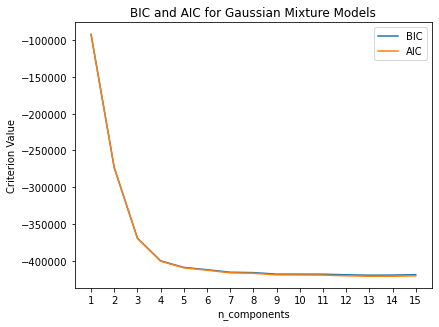

In [100]:
# Range of components to consider
n_components = np.arange(1, 16)

# Fit Gaussian Mixture models with varying components
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_financial[segment_financial])
          for n in n_components]

# Calculate Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) values for each model
bic_values = [m.bic(df_financial[segment_financial]) for m in models]
aic_values = [m.aic(df_financial[segment_financial]) for m in models]

# Plot BIC and AIC values against the number of components
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Models')
plt.xticks(n_components)
plt.show()


In [101]:
# Determine the optimal number of components based on AIC or BIC
optimal_n_components = 4

# Performing GMM clustering with the optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
df_financial_GMM = df_financial.copy()
df_financial_GMM['cluster_labels'] = gmm.fit_predict(df_financial[segment_financial])

# Displaying the mean of each cluster
cluster_means = df_financial_GMM.groupby('cluster_labels').mean()
cluster_means


NumberOfReferences  Dropout  MonthsEnrolled  AvgMonthlyValue
cluster_labels                                                              
0                         0.000000      1.0        0.164232         0.053673
1                         0.000000      0.0        0.332436         0.064052
2                         0.376812      0.0        0.715923         0.062054
3                         0.360841      1.0        0.394890         0.058353

### 5.2.5 Comparing Models

In [102]:
financial_models = {
    "KMeans": df_financial_KM,
    "SOMs": df_financial_som_final,
    "DBSCAN": df_financial_DBSCAN,
    "GMM": df_financial_GMM
}

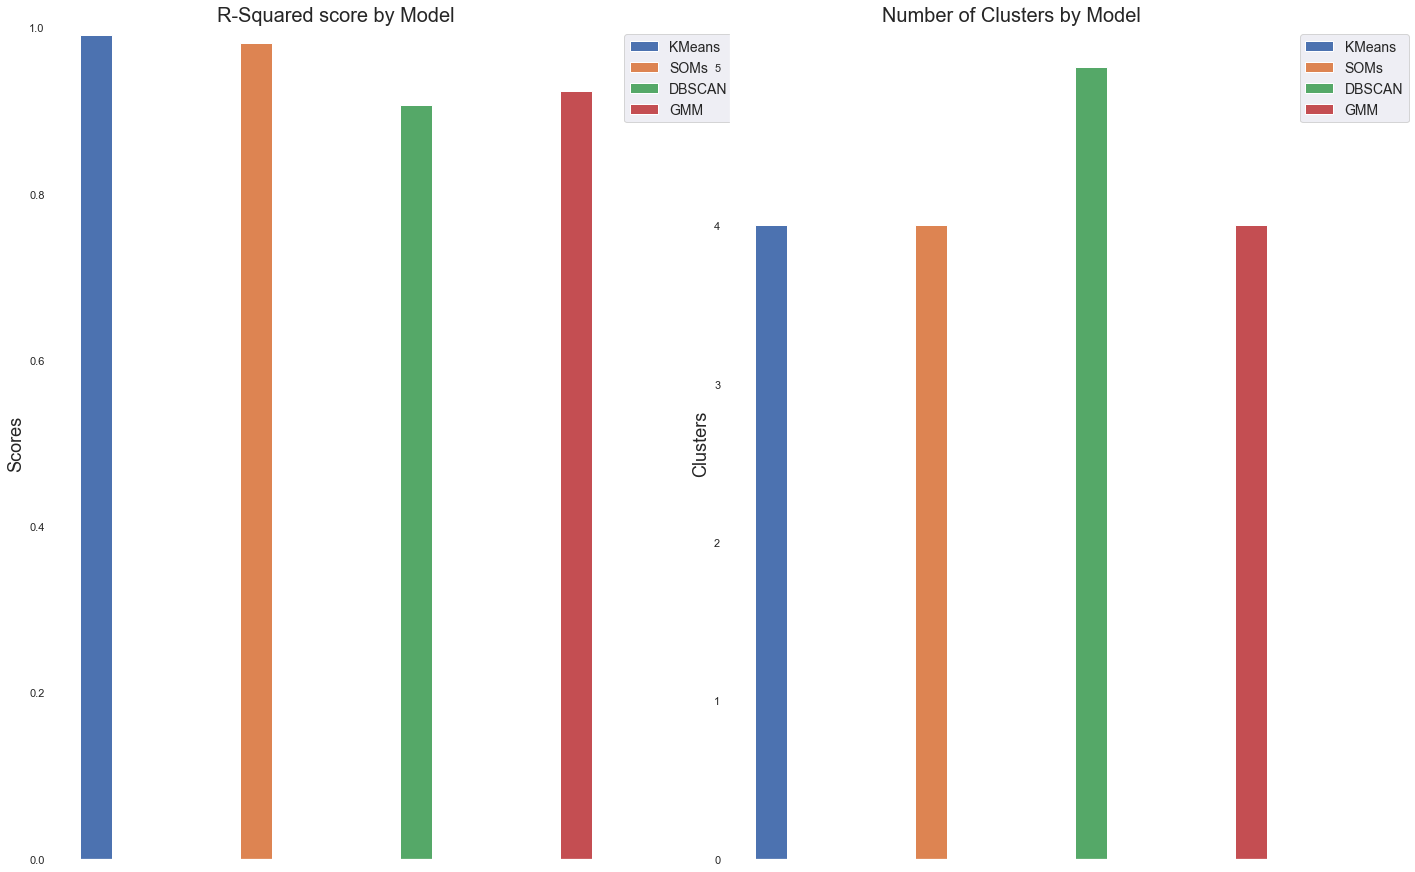

In [103]:
compare_models(financial_models,cluster_column="cluster_labels")

In [104]:
df_financial_final = df_financial_KM.copy()

## 5.3 Attendances Features Clustering

### 5.3.1 K-means and Hierarchical clustering

In [105]:
# Set up the clusters
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

# Obtaining the R² scores for each cluster solution on attendances variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_attendances, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_attendances, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2   0.385279  0.254338  0.003442  0.003442  0.330763
3   0.542729  0.261775  0.006405  0.005638  0.479997
4   0.641643  0.278779  0.023075  0.007736  0.567936
5   0.683741  0.294051  0.060405  0.008877  0.631215
6   0.720796  0.376080  0.062240  0.009887  0.670345
7   0.747406  0.377090  0.065612  0.017753  0.701348
8   0.772406  0.388354  0.067048  0.024556  0.727162
9   0.790694  0.389490  0.067291  0.024625  0.747760
10  0.805000  0.390247  0.314128  0.026038  0.766495
11  0.817296  0.396570  0.314499  0.027583  0.783804
12  0.827765  0.573580  0.314759  0.028845  0.799843
13  0.837144  0.575709  0.315765  0.028904  0.810627
14  0.845209  0.576591  0.319288  0.029864  0.820531
15  0.852313  0.589822  0.415050  0.029896  0.828604

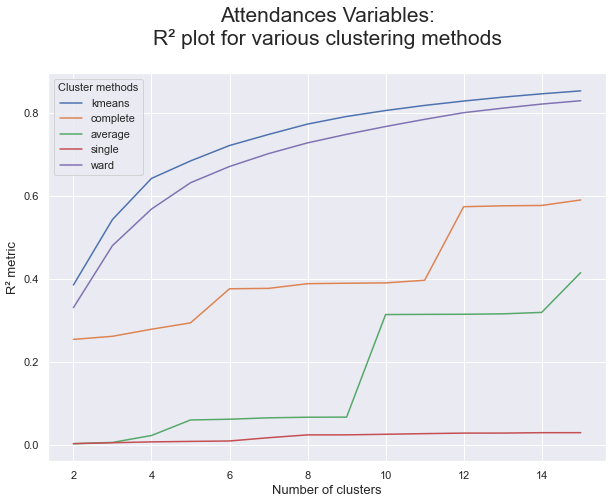

In [106]:
# Visualizing the R² scores for each cluster solution on attendances variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Attendances Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

**K-Means is the best model, lets find the number of clusters**

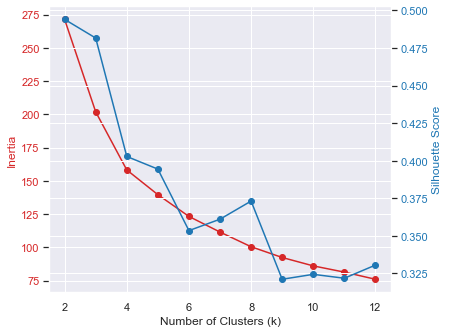

In [107]:
inertia_and_silhouette_plots(df_attendances[segment_attendances],2,12)

**K-Means with 4 Clusters seems like the best option**

In [108]:
# Creating a copy of the Attendances dataframe for K-Means clustering
df_attendances_KM = df_attendances.copy()

# Applying K-Means clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
df_attendances_KM['cluster_labels'] = kmeans_model.fit_predict(df_attendances_KM[segment_attendances])

# Calculating the mean values for each cluster
cluster_means = df_attendances_KM.groupby('cluster_labels').mean()
cluster_means


AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
cluster_labels                                                                  
0                           0.033221              0.064226           0.017087   
1                           0.048870              0.223457           0.002664   
2                           0.028097              0.163621           0.206953   
3                           0.065366              0.489221           0.008220   

                RateOfAllowedVisitsUsed  
cluster_labels                           
0                              0.032084  
1                              0.065587  
2                              0.145211  
3                              0.148235

### 5.3.2 SOMs (Self Organizing Maps)

In [109]:
# Setting a random seed for reproducibility
np.random.seed(42)


# Creating a Self-Organizing Map (SOM) using the SOMFactory for attendances data
som_attendances = sompy.SOMFactory().build(
    data=df_attendances.values, 
    mapsize=[50, 50],
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=segment_attendances
)

# Training the SOM with batch training
som_attendances.train(n_job=-1, verbose=None, train_rough_len=50, train_finetune_len=50)


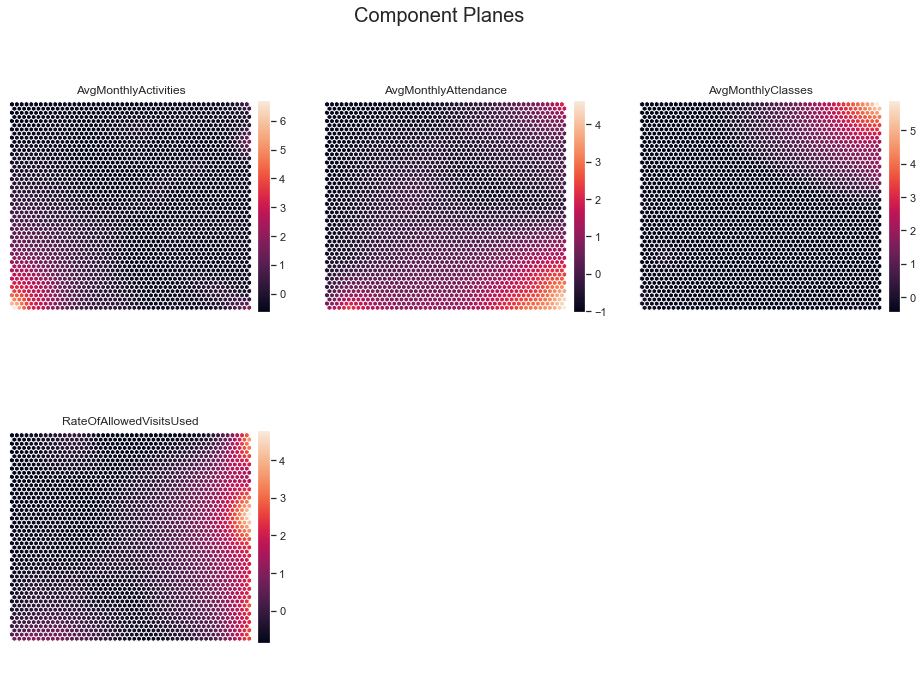

In [110]:
# Plotting component planes with feature names
plt.rcParams['figure.dpi'] = 72
view2D = sompy.visualization.mapview.View2D(12, 12, "", text_size=10)
view2D.show(som_attendances, col_sz=3, what='codebook')

plt.subplots_adjust(top=0.9)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

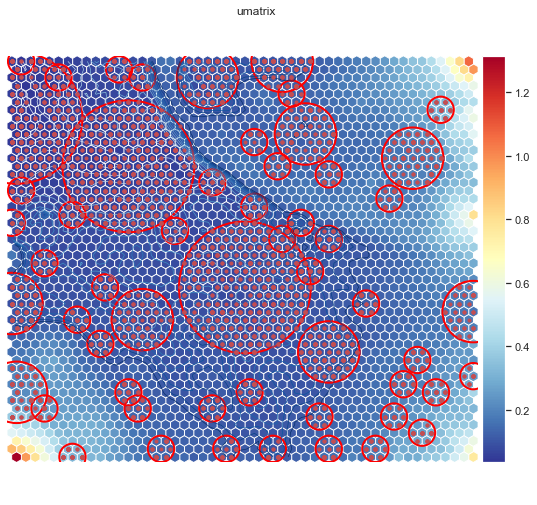

In [111]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    som_attendances, 
    distance=2, 
    row_normalized=False, 
    show_data=False, 
    contour=True, # Visualize isomorphic curves
    blob=True
)


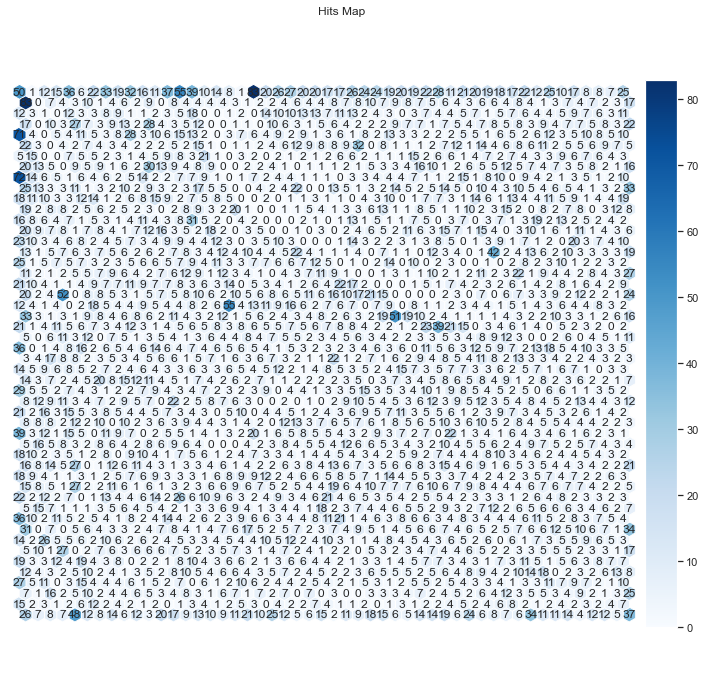

In [112]:
# Show the frequency of each Unit in the output map
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(som_attendances, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

**Hierarchical Clustering on top of SOM units**

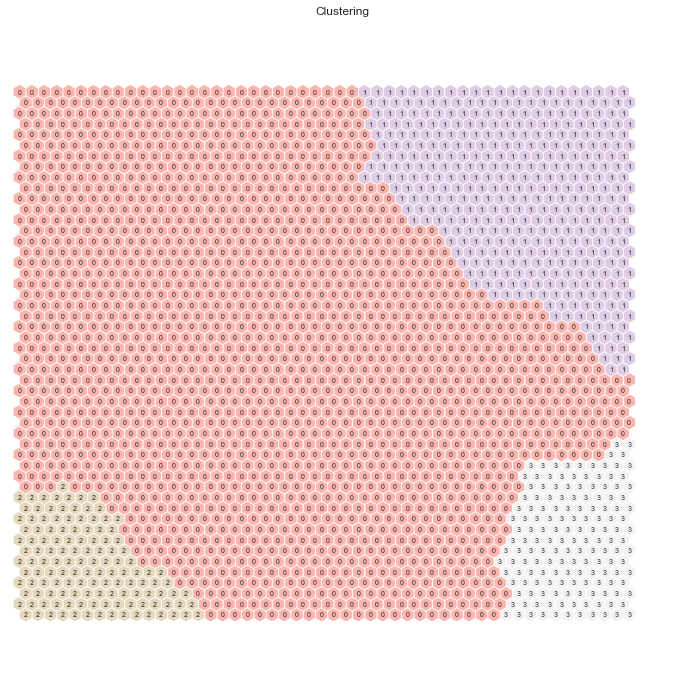

In [113]:
# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(som_attendances.codebook.matrix)
som_attendances.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(som_attendances, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

**K-Means on top of SOM units**

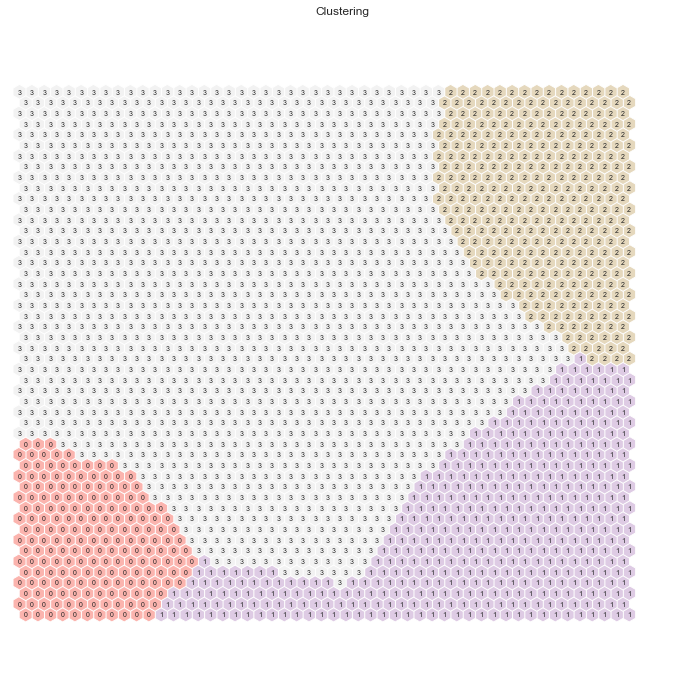

In [114]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(som_attendances.codebook.matrix)
som_attendances.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(som_attendances, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

**Final SOM Clustering solution**

In [115]:
# Create a copy of the original attendances DataFrame
df_attendances_som_final = df_attendances.copy()

# Extract cluster labels using best matching units from the Self-Organizing Map
data_labels = np.array([nodeclus_labels[int(k)] for k in som_attendances._bmu[0]]) 

# Assign the extracted cluster labels to a new column in the DataFrame
df_attendances_som_final['cluster_labels'] = data_labels

# Group the DataFrame by cluster labels and calculate the mean for each cluster
cluster_means= df_attendances_som_final.groupby('cluster_labels').mean()
cluster_means

AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
cluster_labels                                                                  
0                           0.156312              0.179955           0.009434   
1                           0.031250              0.339787           0.002913   
2                           0.025084              0.155501           0.189426   
3                           0.026502              0.082063           0.013758   

                RateOfAllowedVisitsUsed  
cluster_labels                           
0                              0.061553  
1                              0.109560  
2                              0.148448  
3                              0.029081

### 5.3.3 DBSCAN

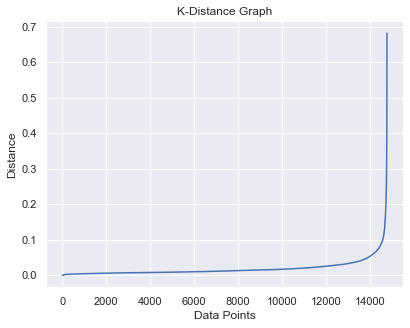

In [116]:
# Plot K-distance graph
plot_k_distance_graph(df_attendances[segment_attendances])


In [117]:
# Apply DBSCAN clustering
df_attendances_DBSCAN = df_attendances.copy()
labels_dbscan = apply_dbscan(df_attendances[segment_attendances],eps=0.05)
df_attendances_DBSCAN['cluster_labels'] = labels_dbscan

# Count the points in each cluster
count_cluster_points(labels_dbscan)


Number of estimated clusters: 2
Number of points in each cluster:
Cluster 0: 14175
Cluster -1: 604


In [118]:
df_attendances_DBSCAN.groupby('cluster_labels').mean()


AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
cluster_labels                                                                  
-1                          0.111748              0.360931           0.156481   
 0                          0.035455              0.133765           0.030065   

                RateOfAllowedVisitsUsed  
cluster_labels                           
-1                             0.208604  
 0                             0.054994

### 5.3.4 GMM (Gaussian Mixture Model )

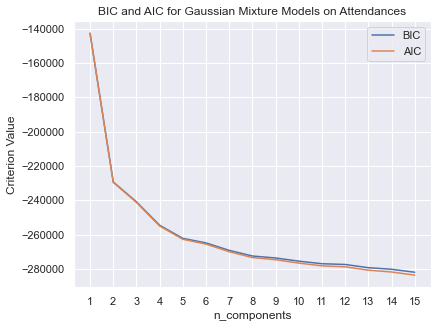

In [119]:
# Range of components to consider for Gaussian Mixture Models
n_components = np.arange(1, 16)

# Fit Gaussian Mixture models with varying components to attendance data
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_attendances[segment_attendances])
          for n in n_components]

# Calculate Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) values for each model
bic_values = [m.bic(df_attendances[segment_attendances]) for m in models]
aic_values = [m.aic(df_attendances[segment_attendances]) for m in models]

# Plot BIC and AIC values against the number of components
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Models on Attendances')
plt.xticks(n_components)
plt.show()


In [120]:
# Determine the optimal number of components based on AIC or BIC
optimal_n_components = 4

# Performing GMM clustering with the optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
df_attendances_GMM = df_attendances.copy()
df_attendances_GMM['cluster_labels'] = gmm.fit_predict(df_attendances[segment_attendances])

# Displaying the mean of each cluster
cluster_means = df_attendances_GMM.groupby('cluster_labels').mean()
cluster_means


AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
cluster_labels                                                                  
0                           0.026147              0.100223           0.000022   
1                           0.074001              0.246417           0.000017   
2                           0.056581              0.183366           0.126233   
3                           0.013998              0.091206           0.118362   

                RateOfAllowedVisitsUsed  
cluster_labels                           
0                              0.026134  
1                              0.094418  
2                              0.124690  
3                              0.070431

### 5.3.5 Comparing Models

In [121]:
attendances_models = {
    "KMeans": df_attendances_KM,
    "SOMs": df_attendances_som_final,
    "DBSCAN": df_attendances_DBSCAN,
    "GMM": df_attendances_GMM
}

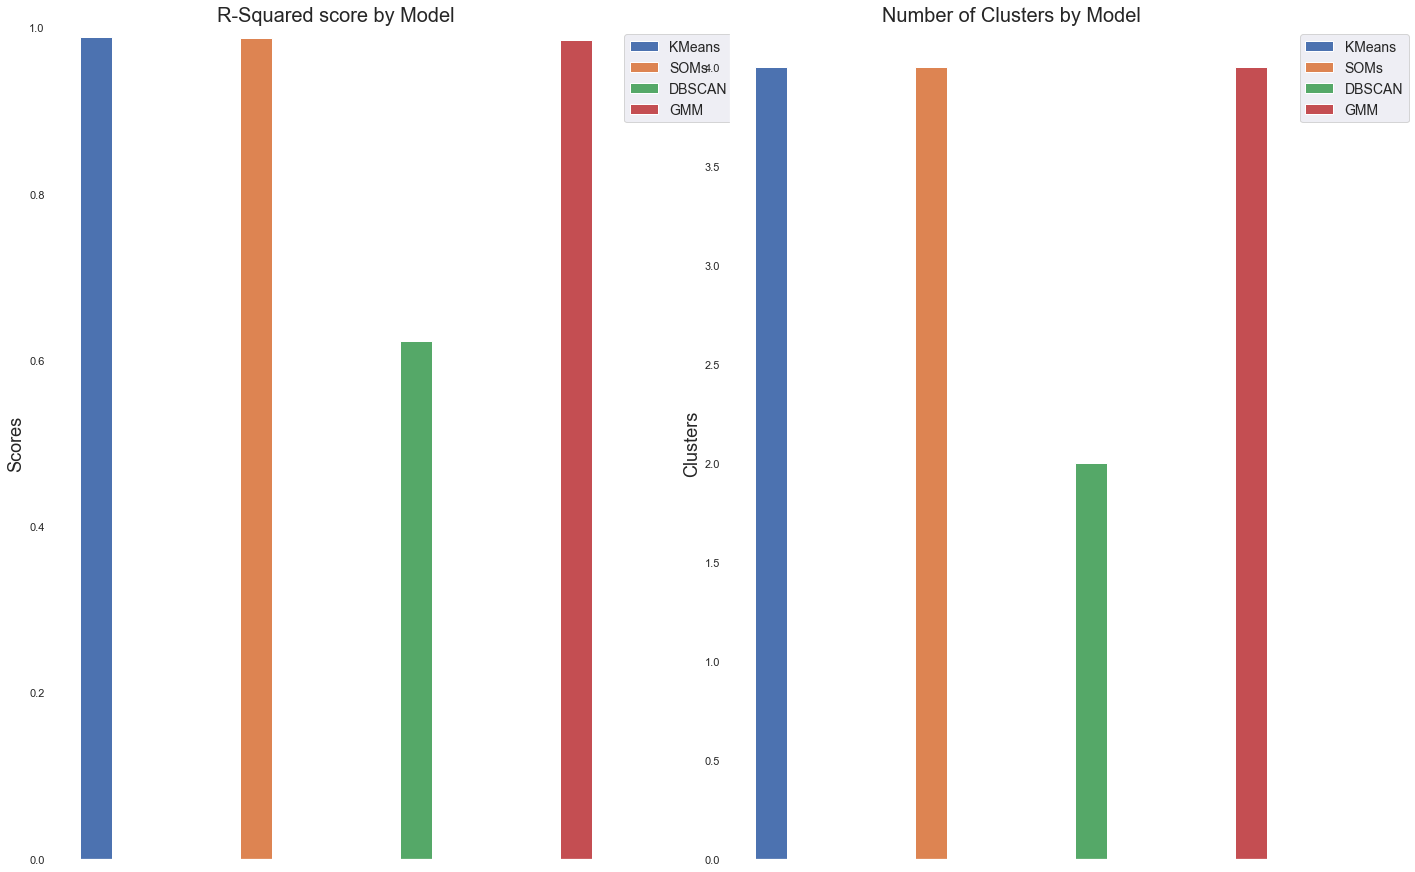

In [122]:
compare_models(attendances_models,cluster_column="cluster_labels")

In [123]:
df_attendances_final = df_attendances_KM.copy()

## 5.4 Merging Clusters

In [124]:
df['demographics_labels'] = df_demographics_final['cluster_labels']
df['financial_labels'] = df_financial_final['cluster_labels']
df['attendances_labels'] = df_attendances_final['cluster_labels']

In [125]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['demographics_labels', 'financial_labels','attendances_labels'])\
    [metric_features].mean()
df_centroids.head(20)

Age  \
demographics_labels financial_labels attendances_labels             
0                   0                0                   0.529374   
                                     1                   0.535179   
                                     2                   0.551964   
                                     3                   0.529089   
                    1                0                   0.579023   
                                     1                   0.601379   
                                     2                   0.565308   
                                     3                   0.595862   
                    2                0                   0.550638   
                                     1                   0.579351   
                                     2                   0.553420   
                                     3                   0.593333   
                    3                0                   0.547823   
                                     1                   0.587396   
                                     2                   0.520348   
                                     3                   0.568966   
1                   0                0                   0.228340   
                                     1                   0.266153   
                                     2                   0.182099   
                                     3                   0.277630   

                                                         NumberOfReferences  \
demographics_labels financial_labels attendances_labels                       
0                   0                0                             0.003324   
                                     1                             0.003460   
                                     2                             0.006944   
                                     3                             0.010256   
                    1                0                             0.007576   
                                     1                             0.000000   
                                     2                             0.020202   
                                     3                             0.013333   
                    2                0                             0.005249   
                                     1                             0.002924   
                                     2                             0.000000   
                                     3                             0.000000   
                    3                0                             0.018182   
                                     1                             0.011494   
                                     2                             0.000000   
                                     3                             0.000000   
1                   0                0                             0.006002   
                                     1                             0.000000   
                                     2                             0.009259   
                                     3                             0.000000   

                                                         MonthsEnrolled  \
demographics_labels financial_labels attendances_labels                   
0                   0                0                         0.112120   
                                     1                         0.098921   
                                     2                         0.130089   
                                     3                         0.077962   
                    1                0                         0.697164   
                                     1                         0.672737   
                                     2                         0.705927   
                                     3                         0.720731   
                    2                0                

In [137]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

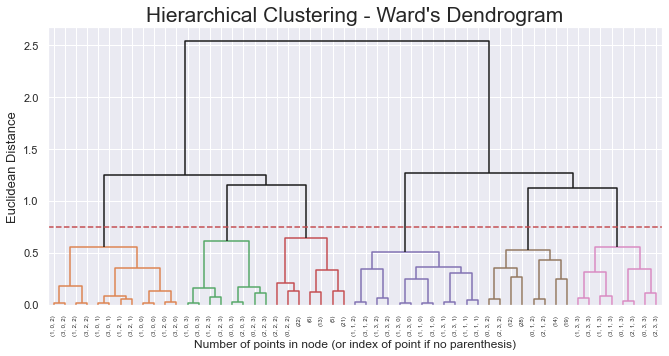

In [143]:
plot_dendrogram(data=df_centroids, y_threshold=0.75, linkage_method="ward", metric='euclidean')
# if this fails to run, run the first cell again, with the imports (weird bug)

In [144]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  \
demographics_labels financial_labels attendances_labels             
0                   0                0                   0.529374   
                                     1                   0.535179   
                                     2                   0.551964   
                                     3                   0.529089   
                    1                0                   0.579023   
...                                                           ...   
3                   2                3                   0.258678   
                    3                0                   0.229842   
                                     1                   0.278325   
                                     2                   0.165476   
                                     3                   0.272481   

                                                         NumberOfReferences  \
demographics_labels financial_labels attendances_labels                       
0                   0                0                             0.003324   
                                     1                             0.003460   
                                     2                             0.006944   
                                     3                             0.010256   
                    1                0                             0.007576   
...                                                                     ...   
3                   2                3                             0.006601   
                    3                0                             0.017677   
                                     1                             0.005952   
                                     2                             0.063063   
                                     3                             0.000000   

                                                         MonthsEnrolled  \
demographics_labels financial_labels attendances_labels                   
0                   0                0                         0.112120   
                                     1                         0.098921   
                                     2                         0.130089   
                                     3                         0.077962   
                    1                0                         0.697164   
...                                                                 ...   
3                   2                3                         0.069956   
                    3                0                         0.506370   
                                     1                         0.441223   
                                     2                         0.483389   
                                     3                         0.418188   

                                                         AvgMonthlyValue  \
demographics_labels financial_labels attendances_labels                    
0                   0                0                          0.059006   
                                     1                          0.068819   
                                     2                          0.069688   
                                     3                          0.082768   
                    1                0                          0.033363   
...                                                                  ...   
3                   2                3                          0.117248   
                    3                0                          0.032719   
                                     1                          0.043346   
                                     2                          0.064826   
                                     3                          0.056616   

                                                         AvgMonthlyActivities  \
demographics_labels financial_labels attendances_labels                         
0        

In [145]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

# Mapping the hierarchical clusters on the centroids to the observations
df['merged_labels'] = df.apply(
    lambda row: cluster_mapper[
        (row['demographics_labels'], row['financial_labels'], row['attendances_labels'])
    ], axis=1
)

# Merged cluster centroids
df.groupby('merged_labels').mean()[metric_features]

Age  NumberOfReferences  MonthsEnrolled  AvgMonthlyValue  \
merged_labels                                                                  
0              0.484936            0.003069        0.115777         0.070735   
1              0.540772            0.009353        0.588396         0.047596   
2              0.215371            0.021934        0.553674         0.041518   
3              0.231531            0.004066        0.118809         0.055716   

               AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
merged_labels                                                                  
0                          0.052181              0.230359           0.027893   
1                          0.006462              0.186770           0.039487   
2                          0.006348              0.100518           0.054197   
3                          0.045107              0.118572           0.032653   

               RateOfAllowedVisitsUsed  
merged_labels                           
0                             0.077327  
1                             0.078501  
2                             0.064463  
3                             0.053093

## 6. Clusters Analysis

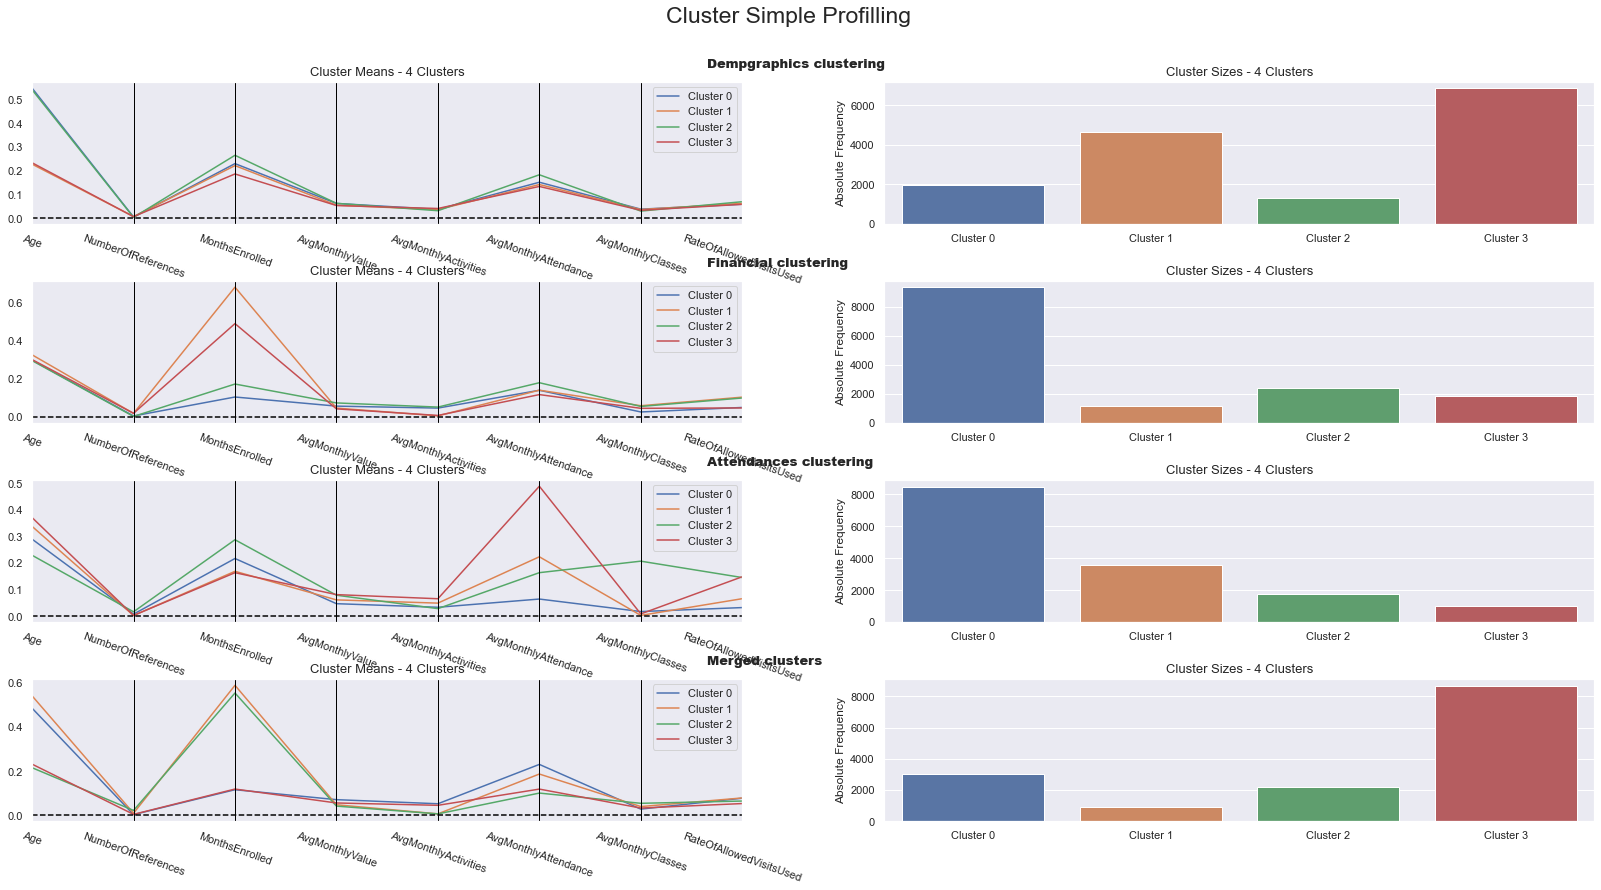

In [146]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df=df[metric_features + ['demographics_labels', 'financial_labels', 'attendances_labels', 'merged_labels']], 
    label_columns=['demographics_labels', 'financial_labels', 'attendances_labels', 'merged_labels'], 
    figsize=(28, 13), 
    compar_titles=["Dempgraphics clustering", "Financial clustering", "Attendances clustering", "Merged clusters"]
)


**Unscaled Data**

In [147]:
df_unscaled = df.copy()
df_unscaled[metric_features] = scaler.inverse_transform(df[metric_features])
df_unscaled

Age  NumberOfReferences  Dropout  MonthsEnrolled  AvgMonthlyValue  \
ID                                                                          
10000  60.0                 0.0        0        1.933333        46.215517   
10001  29.0                 0.0        1       13.266667        36.120603   
10002  23.0                 0.0        1        1.000000        37.600000   
10003   9.0                 0.0        1        5.333333        29.137500   
10004  35.0                 0.0        1       25.933333        14.390746   
...     ...                 ...      ...             ...              ...   
24937  14.0                 0.0        0       38.266667        38.165070   
24938  39.0                 0.0        1        8.700000        39.522989   
24939  20.0                 0.0        1        1.000000        43.600000   
24940  55.0                 0.0        0       20.300000        38.847291   
24941  32.0                 0.0        1       38.866667        23.660377   

       AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
ID                                                                     
10000              0.517241              4.655172           3.620690   
10001              0.075377              1.733668           0.075377   
10002              1.000000              6.000000           0.000000   
10003              0.187500              3.750000           0.375000   
10004              0.038560              1.580977           0.000000   
...                     ...                   ...                ...   
24937              0.026132              2.926829           2.508711   
24938              0.114943              6.551724           0.000000   
24939              1.000000              6.000000           0.000000   
24940              0.049261              9.113300           7.635468   
24941              0.025729              4.348199           0.025729   

       RateOfAllowedVisitsUsed  isMale  demographics_labels  financial_labels  \
ID                                                                              
10000                 0.318471       0                    0                 2   
10001                 0.057405       0                    3                 0   
10002                 0.199800       1                    1                 0   
10003                 0.169300       1                    1                 0   
10004                 0.000000       1                    2                 3   
...                        ...     ...                  ...               ...   
24937                 0.229621       1                    1                 1   
24938                 0.049205       1                    2                 0   
24939                 0.266400       1                    1                 0   
24940                 0.441084       1                    2                 2   
24941                 0.213220       0                    3                 3   

       attendances_labels  merged_labels  
ID                                        
10000                   2              0  
10001                   0              3  
10002                   1              3  
10003                   1              3  
10004                   0              1  
...                   ...            ...  
24937                   2              2  
24938                   1              0  
24939                   1              3  
24940                   2              0  
24941                   1              2  

[14779 rows x 14 columns]

**Mean**

In [148]:
df_unscaled[metric_features + non_metric_features+ ['merged_labels']].groupby('merged_labels').agg('mean')

Age  NumberOfReferences  MonthsEnrolled  AvgMonthlyValue  \
merged_labels                                                                   
0              42.189411            0.009207        7.865505        32.082201   
1              47.047138            0.028058       38.885073        21.587293   
2              18.737257            0.065802       36.606148        18.830908   
3              20.143170            0.012199        8.064530        25.270234   

               AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
merged_labels                                                                  
0                          0.293518              4.948662           0.418397   
1                          0.036351              4.015315           0.592304   
2                          0.035709              2.168439           0.812952   
3                          0.253725              2.555023           0.489795   

               RateOfAllowedVisitsUsed   Dropout    isMale  
merged_labels                                               
0                             0.196425  0.737915  0.391647  
1                             0.199407  0.528620  0.447811  
2                             0.163748  0.648285  0.480074  
3                             0.134867  0.815284  0.381977

**Mode**

In [149]:
df_unscaled[metric_features + non_metric_features+ ['merged_labels']].groupby('merged_labels')\
    .agg(lambda x: x.value_counts().index[0])

Age  NumberOfReferences  MonthsEnrolled  AvgMonthlyValue  \
merged_labels                                                              
0              34.0                 0.0        1.000000        53.600000   
1              35.0                 0.0       34.166667        12.886057   
2              23.0                 0.0       21.366667        28.492982   
3              21.0                 0.0        1.000000        53.600000   

               AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
merged_labels                                                                  
0                          1.000000             10.000000                0.0   
1                          0.026882              1.363636                0.0   
2                          0.046802              0.750000                0.0   
3                          1.000000              3.000000                0.0   

               RateOfAllowedVisitsUsed  Dropout  isMale  
merged_labels                                            
0                                  0.0        1       0  
1                                  0.0        1       0  
2                                  0.0        1       0  
3                                  0.0        1       0

**Median**

In [150]:
df_unscaled[metric_features + non_metric_features+ ['merged_labels']].groupby('merged_labels')\
    .agg('median')

Age  NumberOfReferences  MonthsEnrolled  AvgMonthlyValue  \
merged_labels                                                              
0              40.0                 0.0        6.366667        29.488000   
1              45.0                 0.0       37.300000        22.015572   
2              21.0                 0.0       35.033333        17.294557   
3              21.0                 0.0        6.766667        23.274194   

               AvgMonthlyActivities  AvgMonthlyAttendance  AvgMonthlyClasses  \
merged_labels                                                                  
0                          0.165746              3.666667                0.0   
1                          0.030960              2.963464                0.0   
2                          0.031629              1.836278                0.0   
3                          0.152284              2.142857                0.0   

               RateOfAllowedVisitsUsed  Dropout  isMale  
merged_labels                                            
0                             0.131212      1.0     0.0  
1                             0.128991      1.0     0.0  
2                             0.114811      1.0     0.0  
3                             0.085714      1.0     0.0

In [151]:
dropped_features=metric_features_to_drop + non_metric_features_to_drop + date_features

In [152]:
merged_df = pd.merge(df_not_dropped, df_unscaled, on="ID", how="inner")

In [153]:
merged_df[['merged_labels'] + dropped_features]

merged_labels  Income  LifetimeValue  NumberOfRenewals  \
ID                                                              
10000              0  5500.0          89.35                 0   
10001              3  2630.0         479.20                 2   
10002              3  1980.0          37.60                 0   
10003              3     0.0         155.40                 0   
10004              1  4320.0         373.20                 3   
...              ...     ...            ...               ...   
24937              2     0.0        1460.45                 3   
24938              0  2420.0         343.85                 0   
24939              3  1810.0          43.60                 0   
24940              0  4800.0         788.60                 2   
24941              2  3700.0         919.60                 4   

       AllowedWeeklyVisitsBySLA  RealNumberOfVisits  AttendedClasses  \
ID                                                                     
10000                       5.7                   2                7   
10001                       2.0                   1                1   
10002                       7.0                   6                0   
10003                       2.0                   3                2   
10004                       7.0                   0                0   
...                         ...                 ...              ...   
24937                       4.0                   8               96   
24938                       7.0                   3                0   
24939                       7.0                   8                0   
24940                       3.0                   7              155   
24941                       7.0                  13                1   

       AllowedNumberOfVisitsBySLA  DaysWithoutFrequency  NumberOfFrequencies  \
ID                                                                             
10000                        6.28                     1                  9.0   
10001                       17.42                    60                 23.0   
10002                       30.03                     7                  6.0   
10003                       17.72                    22                 20.0   
10004                       60.97                   210                 41.0   
...                           ...                   ...                  ...   
24937                       34.84                     2                112.0   
24938                       60.97                    38                 57.0   
24939                       30.03                     2                  6.0   
24940                       15.87                     3                185.0   
24941                       60.97                    14                169.0   

       ...  NatureActivities  SpecialActivities  OtherActivities  \
ID     ...                                                         
10000  ...                 0                  0                0   
10001  ...                 0                  1                0   
10002  ...                 0                  0                0   
10003  ...                 0                  0                0   
10004  ...                 0                  0                0   
...    ...               ...                ...              ...   
24937  ...                 0                  0                0   
24938  ...                 0                  0                0   
24939  ...                 0                  0                0   
24940  ...                 0                  0                0   
24941  ...                 0                  0                0   

       WaterActivities  FitnessActivities  EnrollmentStart  EnrollmentFinish  \
ID                                                                             
10000                0                  1       2019-09-03        2019-10-31   
10001                0                  0       2014-08-12

In [154]:
merged_df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0    3041
1     891
2    2158
3    8689
Name: count, dtype: int64

## 6.1 PCA

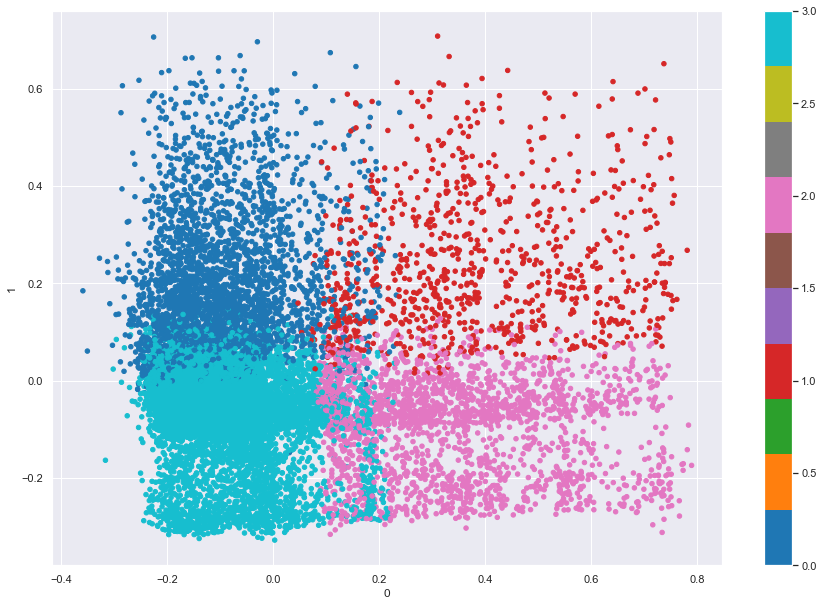

In [156]:
# This is step can be quite time consuming
pca =PCA(random_state=1,n_components=2).fit_transform(df[metric_features])
# t-SNE visualization
pd.DataFrame(pca).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## 6.2 TSNE

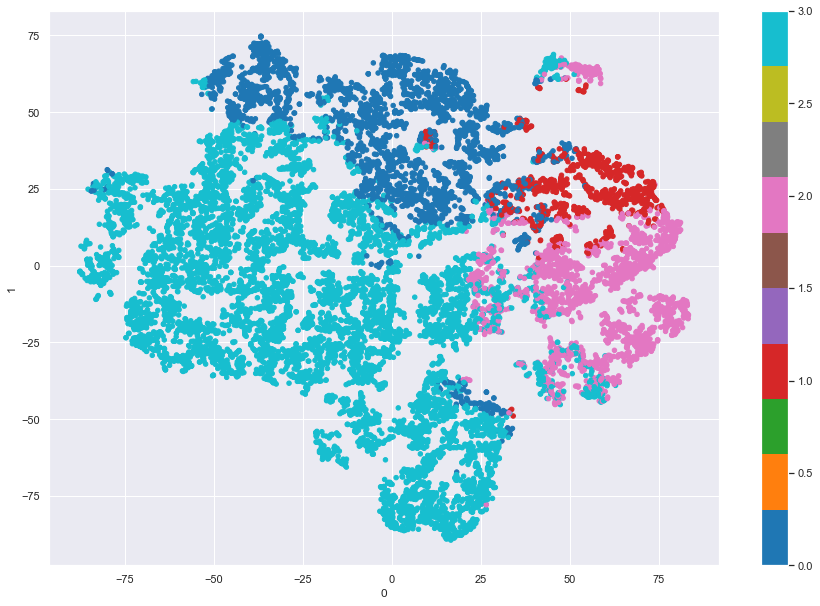

In [157]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42,perplexity=50).fit_transform(df[metric_features])
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## 6.3 Assess feature importance and reclassify outliers

In [158]:
r2_variables(df[metric_features+['merged_labels']],'merged_labels').drop('merged_labels')

Age                        0.544509
NumberOfReferences         0.014503
MonthsEnrolled             0.713958
AvgMonthlyValue            0.062027
AvgMonthlyActivities       0.114395
AvgMonthlyAttendance       0.138454
AvgMonthlyClasses          0.011631
RateOfAllowedVisitsUsed    0.022651
dtype: float64

In [159]:
r2(df[metric_features+['merged_labels']],'merged_labels')

0.9640902657839078

In [160]:
get_ss_variables(df)

Age                          389.063176
NumberOfReferences            41.874401
Dropout                     2713.311997
MonthsEnrolled               674.710722
AvgMonthlyValue               18.952596
AvgMonthlyActivities          35.785516
AvgMonthlyAttendance         245.528497
AvgMonthlyClasses             87.171702
RateOfAllowedVisitsUsed       72.914414
isMale                      3553.564517
demographics_labels        19203.906218
financial_labels           18523.174369
attendances_labels         12684.054672
merged_labels              21544.754043
dtype: float64

In [161]:
# Preparing the data
X = df.drop(columns=['demographics_labels','financial_labels','attendances_labels','merged_labels'])
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 95.57% of the customers correctly


In [162]:
pd.Series(dt.feature_importances_, index=X_train.columns)

Age                        0.373987
NumberOfReferences         0.000000
Dropout                    0.000000
MonthsEnrolled             0.503369
AvgMonthlyValue            0.000000
AvgMonthlyActivities       0.000000
AvgMonthlyAttendance       0.122644
AvgMonthlyClasses          0.000000
RateOfAllowedVisitsUsed    0.000000
isMale                     0.000000
dtype: float64